# Proyecto Integrador 4

## 1° avance: Carga y transformación de los datos

En este primer avance nos centraremos en el dataset proporcionado. El archivo original es considerable, con un peso de aproximadamente 21 GB, conteniendo alrededor de 22 millones de registros y 707 columnas. Conscientes de esta magnitud, los compañeros de ingeniería de datos han preparado un dataset específico, enfocado en los datos de los países de Latinoamérica. Este nuevo archivo, en formato CSV, cuenta con 12,216,057 filas y 50 columnas, lo que facilitará su manipulación y análisis. Además, han creado un archivo adicional para facilitar el trabajo: "readme.txt" que contiene información detallada sobre las columnas seleccionadas. Es importante resaltar la importancia de una adecuada preparación y limpieza de datos para el análisis subsiguiente.


### @2. Importación de librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### @3 Lee el archivo data_latinoamerica.csv con código Python en Visual Studio Code.

In [2]:
data = pd.read_csv('C:/Users/gonza/Downloads/Modulo 4/data_latinoamerica.csv')

### @4 Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas.

In [3]:
# Verificar la forma del dataset
print(f"El dataset original tiene {data.shape[0]} filas y {data.shape[1]} columnas")

El dataset original tiene 12216057 filas y 50 columnas


### @5 Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.


In [4]:
paises_a_expandir = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_a_expandir)] # Máscara

print(f"Dataset filtrado por países: {data_latinoamerica.shape[0]} filas")

Dataset filtrado por países: 11970289 filas


Filtré únicamente los registros de los seis países definidos por la empresa BIOGENESYS para su potencial expansión en Latinoamérica. Esto permite enfocar el análisis y reducir la cantidad de datos a procesar, mejorando el rendimiento y la claridad del estudio.


Verificaremos la cantidad de datos faltantes por columnas y si es necesario haremos limpieza de los datos donde se presenten valores mayores a 4 millones de datos faltantes

In [5]:
data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Revisé la presencia de valores nulos para entender qué columnas podrían afectar la calidad del análisis. Este paso es fundamental antes de cualquier modelado o generación de insights, ya que los valores faltantes pueden sesgar o distorsionar los resultados.



Despues de haber hecho un analisis de la calidad de los datos, podemos ver que tenemos datos faltantes en muchas columnas, por lo que despues realizaremos un nuevo filtro por la columna (Location_key) pero solo utilizaremos instancias de los paises seleccionados y no a sus regiones o subregiones

### @6. Filtra los datos por solo instancias de los paises seleccionados y no a sus regiones o subregiones

In [6]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]
print(f"Dataset a nivel país: {data_latinoamerica_paises.shape[0]} filas")

Dataset a nivel país: 5946 filas


### @7. Filtra los datos en fechas mayores a 2021-01-01.

In [7]:
df_av1 = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01'] 
print(f"Dataset filtrado por fecha: {df_av1.shape[0]} filas")


Dataset filtrado por fecha: 3744 filas


Filtré los datos posteriores al 1 de enero de 2021, ya que se considera un período más relevante para el análisis post-pandemia y el contexto actual de decisiones estratégicas.

Ahora si con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacíos. 

### @8. Análisis de valores faltantes

In [8]:
print(df_av1.isnull().sum())

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [9]:
print("Valores faltantes por columna:\n")
print(df_av1.isnull().sum()[df_av1.isnull().sum() > 0])

Valores faltantes por columna:

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


#### 📌 Criterios de eliminación
Demasiados valores nulos: Si una columna tiene más del 50% de datos faltantes, su utilidad es cuestionable.

Redundancia: Si hay columnas con información derivada de otras (ejemplo: datos acumulativos vs. valores diarios).

Relevancia: Si una columna no aporta valor al análisis de COVID-19 o la expansión del negocio.

#### 🔥 Conclusión: Columnas que podría eliminar

cumulative_confirmed ✅ (Se puede calcular con new_confirmed)

cumulative_deceased ✅ (Se puede calcular con new_deceased)

minimum_temperature_celsius y maximum_temperature_celsius ✅ (similar a average_temperature_celsius)

new_recovered ❓ (Más del 50% de nulos, poco confiable)

cumulative_recovered ✅ (Más del 70% de nulos y se puede calcular con new_recovered)

population_largest_city ✅ (No aporta información relevante para el análisis)

latitude, longitude ✅ (No son útiles si el análisis es a nivel país y no de regiones específicas)

pollution_mortality_rate ✅ (No aporta información relevante para el análisis del COVID-19 en este caso)

gdp y gdp_per_capita ✅ (Ya que no estoy analizando la relación entre economía y COVID-19).

relative_humidity y rainfall ✅ (No voy a considerar estos factores climáticos o ambientales excepto por average_temperature)

area, area_rural_sq_km y area_urban_sq_km  ✅	(No son relevantes para series temporales o correlaciones con COVID-19/vacunación)


Mantener a new_recovered podría ser valioso para gráficos de tendencias. Pero si los datos faltantes comprometen la calidad, podría tratarlas con imputaciones cuidadosas.

In [10]:
df_av1.drop(columns=['cumulative_confirmed', 'cumulative_deceased', 
                     'minimum_temperature_celsius', 'maximum_temperature_celsius', 'pollution_mortality_rate',
                    'cumulative_recovered', 'latitude', 'longitude','population_largest_city',
                    'gdp_usd', 'gdp_per_capita_usd', 'relative_humidity', 'rainfall_mm',
                    'area_sq_km', 'area_rural_sq_km', 'area_urban_sq_km'], inplace=True)

C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\478890673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av1.drop(columns=['cumulative_confirmed', 'cumulative_deceased',


### @8. Estrategia de imputación
Imputarlas con qué valor? imputaremos con dos estrategias distintas. 

1ra. Para las que tienen pocos faltantes vamos a imputarlas con el promedio, con el mean, con el pais que corresponde en cuestion, para eso iteraremos con un ciclo for.

2da. Llenaremos NaN con el valor 0 en las columnas con más valores faltantes

#### 📌 Justificación de la Estrategia de Imputación
La decisión de imputar valores en lugar de eliminarlos se basa en la necesidad de preservar la mayor cantidad posible de información en el dataset, minimizando la pérdida de datos relevantes. Para ello, se aplicaron dos estrategias diferentes según la cantidad de valores faltantes en cada columna:

1️⃣ Imputación con la Media del País

Se utiliza la media del país correspondiente para completar valores nulos en variables con pocos valores faltantes (ejemplo: new_confirmed, new_deceased, cumulative_confirmed, etc.).

Justificación: La media es una buena estimación en conjuntos de datos con una distribución relativamente normal, evitando sesgos al reemplazar valores con un único número global.

Se agrupa por país porque las condiciones epidemiológicas y climáticas varían entre países, por lo que promediar a nivel regional o global podría distorsionar la información.

2️⃣ Imputación con Cero (0) para Variables con Muchos Faltantes

Se aplica a columnas con una cantidad significativa de valores faltantes (ejemplo: new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered).

Justificación: En casos donde una gran cantidad de registros no reportan datos, esto suele indicar ausencia de eventos en lugar de datos realmente perdidos. Usar cero evita la introducción de valores artificiales que puedan sesgar análisis posteriores.

📌 Beneficios de esta aproximación
✅ Evita eliminar datos valiosos que podrían ser útiles en modelos analíticos.
✅ Respeta la variabilidad entre países en lugar de usar un promedio global.
✅ No introduce sesgos en variables con demasiados valores faltantes.
✅ Mantiene la coherencia con la realidad epidemiológica y climática de cada país.

In [11]:
# Usamos un for para completar los valores nulos de las columnas de la media de cada pais
for pais in paises_a_expandir:
    df_av1['new_confirmed'] = df_av1['new_confirmed'].fillna(df_av1[df_av1['country_name'] == pais]['new_confirmed'].mean())
    df_av1['new_deceased'] = df_av1['new_deceased'].fillna(df_av1[df_av1['country_name'] == pais]['new_deceased'].mean())
    df_av1['average_temperature_celsius'] = df_av1['average_temperature_celsius'].fillna(df_av1[df_av1['country_name']==pais]['average_temperature_celsius'].mean())
    
# Llenar NaN con el valor 0 en las columnas con más valores faltantes
df_av1['new_recovered'] = df_av1['new_recovered'].fillna(0)
df_av1['cumulative_vaccine_doses_administered'] = df_av1['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\1801848381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av1['new_confirmed'] = df_av1['new_confirmed'].fillna(df_av1[df_av1['country_name'] == pais]['new_confirmed'].mean())
C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\1801848381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av1['new_deceased'] = df_av1['new_deceased'].fillna(df_av1[df_av1['country_name'] == pais]['new_deceased'].mean())
C:\Users\gonza\AppData\Local\Temp\ipykernel_295

### @9. Verificar que no quedan valores nulos

In [12]:
print("\nValores faltantes después de imputación:")
print(df_av1.isnull().sum())


Valores faltantes después de imputación:
location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_79                     0
population_a

### @10. Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [13]:
df_av1.to_csv('DatosFinalesFiltrados.csv', index = False)

### @11. Aplicar bucles for y/o while para el cálculo de estadísticas descriptivas
Aplica bucles for y/o while para calcular estadísticas descriptivas y otras métricas importantes.






In [14]:
# Asegurémonos de que tenemos las columnas numéricas correctas
columnas_numericas = df_av1.select_dtypes(include=['int64', 'float64']).columns

# Estadísticas descriptivas básicas usando bucles
print("\n🔍 Estadísticas descriptivas por país: 🔍")
for pais in paises_a_expandir:
    print(f"\n--- ✅ {pais} ---")
    df_pais = df_av1[df_av1['country_name'] == pais]
    
    for col in columnas_numericas:
        if col not in ['population', 'population_male', 'population_female']:  
            
            print(f"\n{col}:")
            print(f"  Media: {df_pais[col].mean():.2f}")
            print(f"  Mediana: {df_pais[col].median():.2f}")
            print(f"  Desviación estándar: {df_pais[col].std():.2f}")
            print(f"  Mínimo: {df_pais[col].min():.2f}")
            print(f"  Máximo: {df_pais[col].max():.2f}")


🔍 Estadísticas descriptivas por país: 🔍

--- ✅ Colombia ---

new_confirmed:
  Media: 7407.41
  Mediana: 2585.00
  Desviación estándar: 9222.16
  Mínimo: 0.00
  Máximo: 40415.00

new_deceased:
  Media: 185.10
  Mediana: 93.50
  Desviación estándar: 202.00
  Mínimo: 0.00
  Máximo: 716.00

cumulative_vaccine_doses_administered:
  Media: 19963480.12
  Mediana: 534729.00
  Desviación estándar: 27813017.01
  Mínimo: 0.00
  Máximo: 87566541.00

population_rural:
  Media: 9512141.00
  Mediana: 9512141.00
  Desviación estándar: 0.00
  Mínimo: 9512141.00
  Máximo: 9512141.00

population_urban:
  Media: 40827302.00
  Mediana: 40827302.00
  Desviación estándar: 0.00
  Mínimo: 40827302.00
  Máximo: 40827302.00

population_density:
  Media: 45.86
  Mediana: 45.86
  Desviación estándar: 0.00
  Mínimo: 45.86
  Máximo: 45.86

human_development_index:
  Media: 0.75
  Mediana: 0.75
  Desviación estándar: 0.00
  Mínimo: 0.75
  Máximo: 0.75

population_age_00_09:
  Media: 7414155.00
  Mediana: 7414155.00


##### NOTA

. Evitar columnas muy grandes en el análisis estadístico automático, nos aseguramos de: 

. Mantener el foco en variables que realmente varían en el tiempo. 

. Optimizar recursos computacionales. Procesar columnas con valores grandes consume más recursos sin aportar insights adicionales.

. Evitar distorsiones en las métricas agregadas. 

##### Preguntas para analizar las métricas
- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Las métricas descriptivas (media, mediana, desviación estándar, etc.) proporcionan una visión general de la distribución y variabilidad de los datos, lo que es crucial para identificar tendencias y anomalías.

- ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

No, solo se muestran estadísticas para columnas numéricas. Las columnas categóricas no tienen estadísticas como la media o la desviación estándar.

- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

Las columnas categóricas no tienen valores numéricos que puedan ser promediados o medidos en términos de dispersión. Esto significa que para estas columnas, se necesitan métodos de análisis diferentes, como el conteo de frecuencias o la moda.

### @12. Crear una función para obtener la mediana, varianza y el rango



In [15]:
def calcular_estadisticas(df, col):
    mediana = df[col].median()
    varianza = df[col].var()
    rango = df[col].max() - df[col].min()
    return mediana, varianza, rango

In [16]:
print("\n🔍 ANÁLISIS ESTADÍSTICO DETALLADO POR PAÍS 🔍")

for pais in paises_a_expandir:
    print(f"\n✅ {pais} ({df_av1[df_av1['country_name'] == pais].shape[0]} registros)")
    df_pais = df_av1[df_av1['country_name'] == pais]
    
    
    for col in columnas_numericas:
        if col not in ['population', 'population_male', 'population_female']:  
            mediana, varianza, rango = calcular_estadisticas(df_pais, col)
            print(f"\n📌 {col}:")
            print(f"  Mediana: {mediana:.2f}")
            print(f"  Varianza: {varianza:.2f}")
            print(f"  Rango: {rango:.2f}")


🔍 ANÁLISIS ESTADÍSTICO DETALLADO POR PAÍS 🔍

✅ Colombia (624 registros)

📌 new_confirmed:
  Mediana: 2585.00
  Varianza: 85048254.62
  Rango: 40415.00

📌 new_deceased:
  Mediana: 93.50
  Varianza: 40804.43
  Rango: 716.00

📌 cumulative_vaccine_doses_administered:
  Mediana: 534729.00
  Varianza: 773563915111007.50
  Rango: 87566541.00

📌 population_rural:
  Mediana: 9512141.00
  Varianza: 0.00
  Rango: 0.00

📌 population_urban:
  Mediana: 40827302.00
  Varianza: 0.00
  Rango: 0.00

📌 population_density:
  Mediana: 45.86
  Varianza: 0.00
  Rango: 0.00

📌 human_development_index:
  Mediana: 0.75
  Varianza: 0.00
  Rango: 0.00

📌 population_age_00_09:
  Mediana: 7414155.00
  Varianza: 0.00
  Rango: 0.00

📌 population_age_10_19:
  Mediana: 8119876.00
  Varianza: 0.00
  Rango: 0.00

📌 population_age_20_29:
  Mediana: 8847061.00
  Varianza: 0.00
  Rango: 0.00

📌 population_age_30_39:
  Mediana: 7810299.00
  Varianza: 0.00
  Rango: 0.00

📌 population_age_40_49:
  Mediana: 6450787.00
  Varian

Preguntas para analizar las medidas

- ¿Qué representa la mediana?

La mediana es el valor que divide el conjunto de datos en dos partes iguales, es decir, el valor central. Es útil para entender la tendencia central de los datos, especialmente cuando hay valores atípicos.

- ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?

La varianza mide cuán dispersos están los datos alrededor de la media, mientras que el rango indica la diferencia entre el valor máximo y mínimo. Una varianza alta y un rango amplio indican una alta dispersión de los datos.

- ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Una varianza baja y un rango estrecho indican que los datos están más concentrados alrededor de la mediana, lo que sugiere consistencia. Por el contrario, una varianza alta y un rango amplio indican alta variabilidad y posiblemente la presencia de valores atípicos.

## 2° avance Análisis Exploratorio – Visualización

### @1. Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

### @2. Importa las librerías que necesites utilizar en este avance.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### @3. Cargar el archivo csv


In [18]:
df_av2 = pd.read_csv(r'C:\Users\gonza\Documents\Data Analyst Henry\M4\DatosFinalesFiltrados.csv')
df_av2

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    7407.414516   
3741           PE  2022-09-15           PE         Peru    7407.414516   
3742           PE  2022-09-16           PE         Peru    7407.414516   
3743           PE  2022-09-17           PE         Peru    7407.414516   

      new_deceased  cumulative_vaccine_doses_administered  population  \
0       166.000000                                20334.0  44938712.0   
1       157.000000                                20529.0  44938712.0   
2       157.000000                                25164.0  44938712.0   
3       160.000000                                29852.0  44938712.0   
4       131.000000                                34162.0  44938712.0   
...            ...                                    ...         ...   
3739     22.000000                                    0.0  29381884.0   
3740    185.096774                                    0.0  29381884.0   
3741    185.096774                                    0.0  29381884.0   
3742    185.096774                                    0.0  29381884.0   
3743    185.096774                                    0.0  29381884.0   

      population_male  population_female  ...  diabetes_prevalence  \
0          19523766.0         20593330.0  ...                  5.9   
1          19523766.0         20593330.0  ...                  5.9   
2          19523766.0         20593330.0  ...                  5.9   
3          19523766.0         20593330.0  ...                  5.9   
4          19523766.0         20593330.0  ...                  5.9   
...               ...                ...  ...                  ...   
3739       14450757.0         14931127.0  ...                  6.6   
3740       14450757.0         14931127.0  ...                  6.6   
3741       14450757.0         14931127.0  ...                  6.6   
3742       14450757.0         14931127.0  ...                  6.6   
3743       14450757.0         14931127.0  ...                  6.6   

      infant_mortality_rate  nurses_per_1000  physicians_per_1000  \
0                       8.8           2.5996               3.9901   
1                       8.8           2.5996               3.9901   
2                       8.8           2.5996               3.9901   
3                       8.8           2.5996               3.9901   
4                       8.8           2.5996               3.9901   
...                     ...              ...                  ...   
3739                   11.1           2.4398               1.3048   
3740                   11.1           2.4398               1.3048   
3741                   11.1           2.4398               1.3048   
3742                   11.1           2.4398               1.3048   
3743                   11.1           2.4398               1.3048   

      average_temperature_celsius  life_expectancy  adult_male_mortality_rate  \
0                       27.740741           76.520                    147.086   
1                       21.956790           76.520                    147.086   
2                       24.894444           76.520                    147.086   
3                       20.104938           76.520                    147.086   
4                       20.919753           76.520                    147.086   
...                           ...              ...                        ...   
37

### @4. Análisis Estadístico con Pandas y Numpy:

Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

#### Medidas de tendencia central y dispersión

In [19]:
estadisticas = df_av2.describe()
print(estadisticas)

       new_confirmed  new_deceased  cumulative_vaccine_doses_administered  \
count    3744.000000   3744.000000                           3.744000e+03   
mean    13899.659376    276.647712                           6.544474e+07   
std     24210.340842    507.067671                           9.247680e+07   
min      -573.000000      0.000000                           0.000000e+00   
25%      1536.750000     26.000000                           2.618297e+06   
50%      5227.000000    101.000000                           3.244576e+07   
75%     14812.750000    311.000000                           7.478108e+07   
max    298408.000000  11447.000000                           3.478685e+08   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07  

Generé un resumen estadístico para obtener una primera visión de los datos cuantitativos. Esto me permitió conocer los rangos, medias, valores mínimos y máximos, y posibles outliers que podrían afectar el análisis posterior.

#### Matriz de correlación

In [20]:
# Calculamos correlaciones solo para variables numéricas
corr_matrix = df_av2.select_dtypes(include=['float64', 'int64']).corr()

# Filtramos correlaciones significativas (>0.5 o <-0.5)
corr_significativas = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
print("\nCorrelaciones significativas (>0.5 o <-0.5):")
print(corr_significativas)


Correlaciones significativas (>0.5 o <-0.5):
                                       new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.523668   
new_deceased                                0.523668      1.000000   
cumulative_vaccine_doses_administered            NaN           NaN   
population                                       NaN           NaN   
population_male                                  NaN           NaN   
population_female                                NaN           NaN   
population_rural                                 NaN           NaN   
population_urban                                 NaN           NaN   
population_density                               NaN           NaN   
human_development_index                          NaN           NaN   
population_age_00_09                             NaN           NaN   
population_age_10_19                             NaN           NaN   
population_age_20_29                        

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Ponemos como indice la columna 'date' para poder hacer un analisis de datos a lo largo del tiempo

In [21]:
df_av2['date'] = pd.to_datetime(df_av2['date']) # Convertimos la columna 'date' a datetime
df_av2.set_index('date', inplace=True) # Marcamos a 'date' como índice 
df_av2.head() # Visualizamos el encabezado de la tabla ahora 'date' pasa a ser Indice

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_vaccine_doses_administered  population  \
date                                                                          
2021-01-02         166.0                                20334.0  44938712.0   
2021-01-03         157.0                                20529.0  44938712.0   
2021-01-04         157.0                                25164.0  44938712.0   
2021-01-05         160.0                                29852.0  44938712.0   
2021-01-06         131.0                                34162.0  44938712.0   

            population_male  population_female  population_rural  ...  \
date                                                              ...   
2021-01-02       19523766.0         20593330.0         3599141.0  ...   
2021-01-03       19523766.0         20593330.0         3599141.0  ...   
2021-01-04       19523766.0         20593330.0         3599141.0  ...   
2021-01-05       19523766.0         20593330.0         3599141.0  ...   
2021-01-06       19523766.0         20593330.0         3599141.0  ...   

            diabetes_prevalence  infant_mortality_rate  nurses_per_1000  \
date                                                                      
2021-01-02                  5.9                    8.8           2.5996   
2021-01-03                  5.9                    8.8           2.5996   
2021-01-04                  5.9                    8.8           2.5996   
2021-01-05                  5.9                    8.8           2.5996   
2021-01-06                  5.9                    8.8           2.5996   

            physicians_per_1000  average_temperature_celsius  life_expectancy  \
date                                                                            
2021-01-02               3.9901                    27.740741            76.52   
2021-01-03               3.9901                    21.956790            76.52   
2021-01-04               3.9901                    24.894444            76.52   
2021-01-05               3.9901                    20.104938            76.52   
2021-01-06               3.9901                    20.919753            76.52   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06                    147.086                       79.483   

            comorbidity_mortality_rate  new_recovered  
date                                                   
2021-01-02                        15.8            0.0  
2021-01-03                        15.8            0.0  
2021-01-04                        15.8            0.0  
2021-01-05                        15.8            0.0  
2021-01-06                        15.8            0.0  

[5 rows x 33 columns]

### @5. Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones.

#### Configuración global de estilo

In [22]:
# Configuración global para los gráficos
config_graficos = {"figsize": (12, 6), "palette": "rocket", "title_fontsize": 16, "label_fontsize": 14, "xticks_rotation": 45, "grid": True}

# Aplicar configuración global
sns.set_style("darkgrid")
sns.set_palette(config_graficos["palette"])

def configurar_grafico(titulo, xlabel, ylabel):
    plt.title(titulo, fontsize=config_graficos["title_fontsize"], fontweight='bold')
    plt.xlabel(xlabel, fontsize=config_graficos["label_fontsize"])
    plt.ylabel(ylabel, fontsize=config_graficos["label_fontsize"])
    plt.xticks(rotation=config_graficos["xticks_rotation"])
    if config_graficos["grid"]:
        plt.grid(True)


#### 1. Gráficos de Barras de Países contra el Resto de Variables

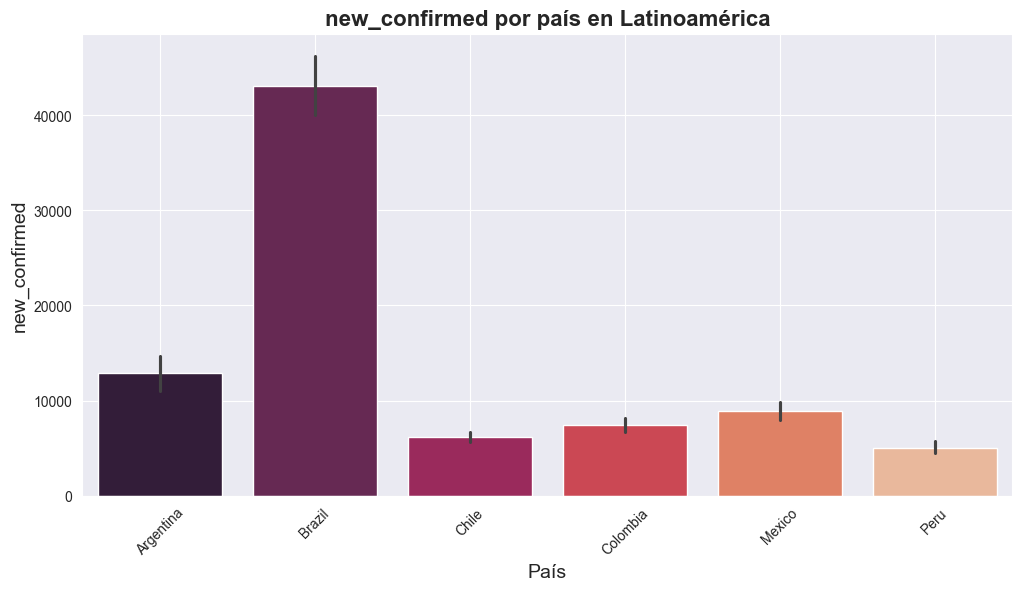

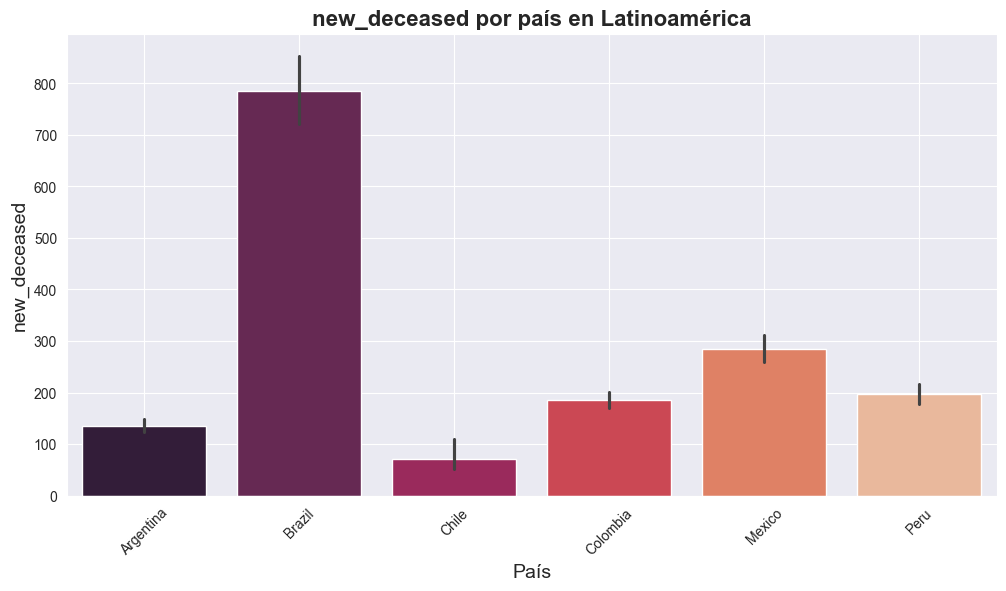

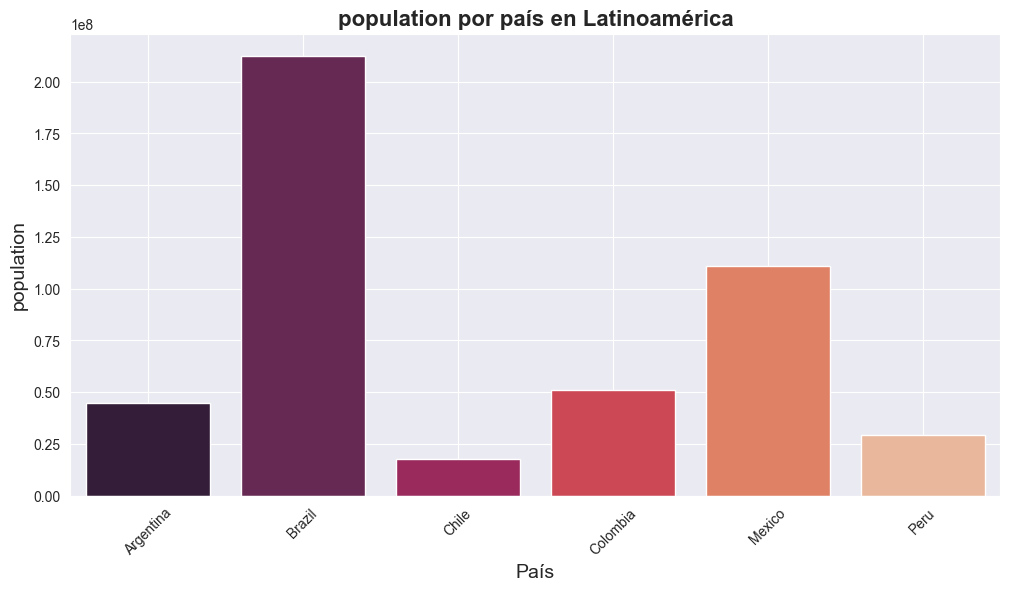

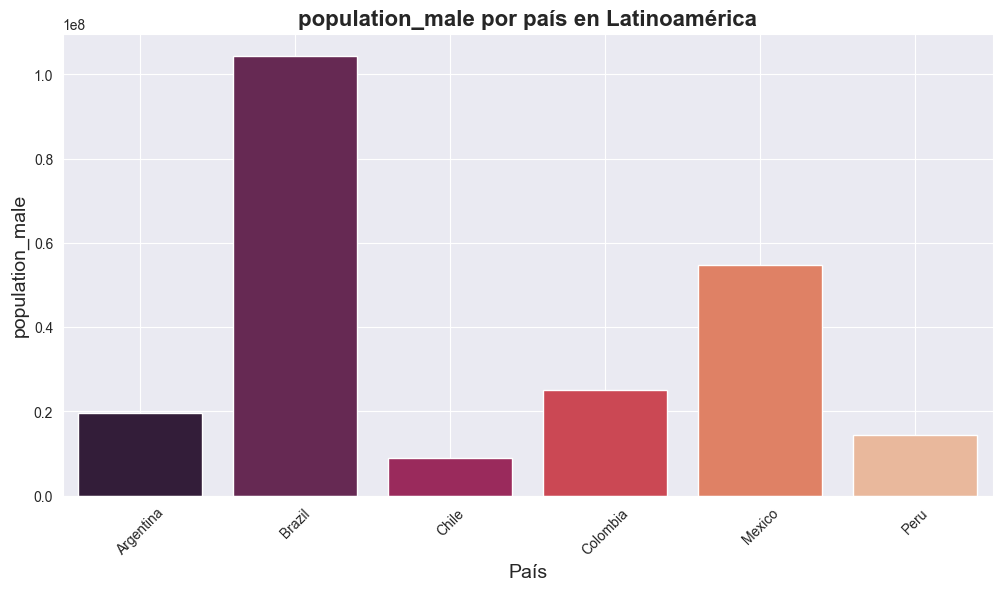

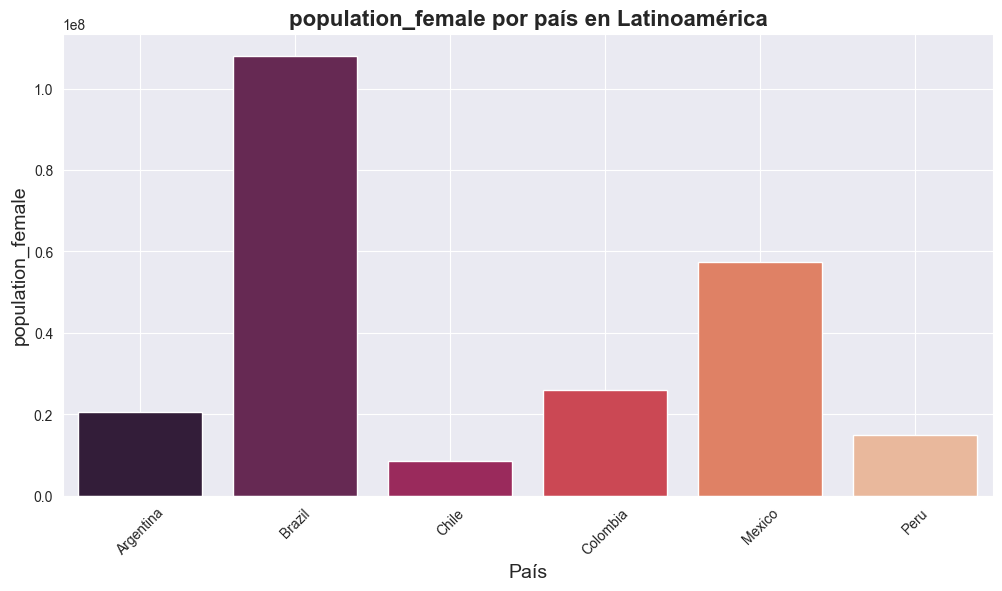

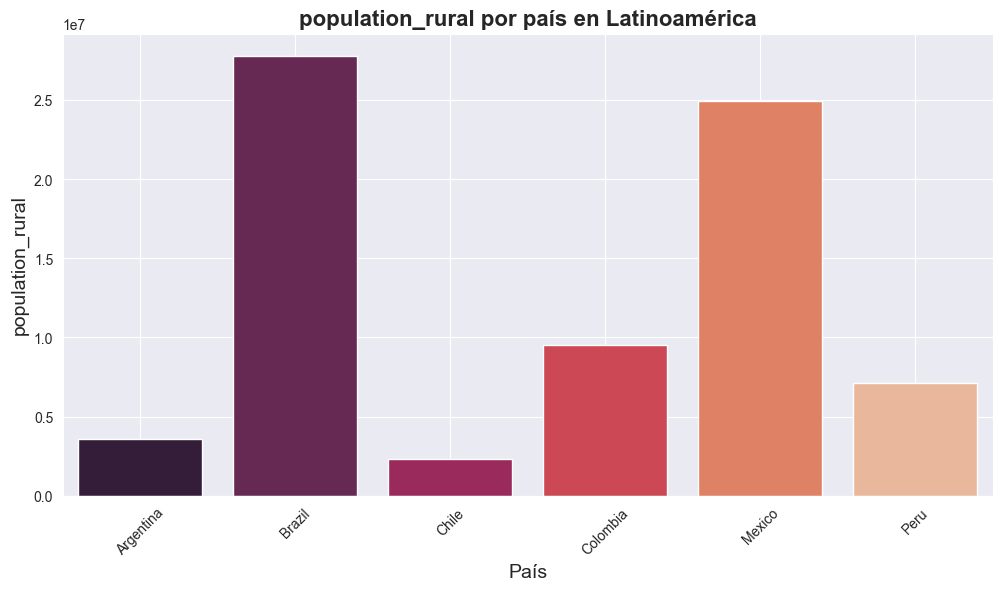

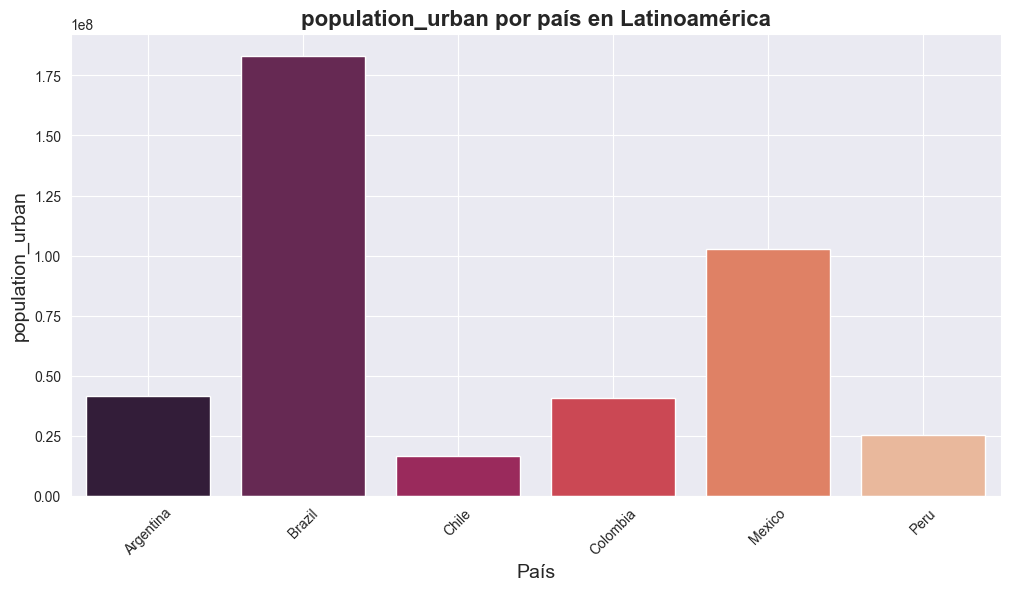

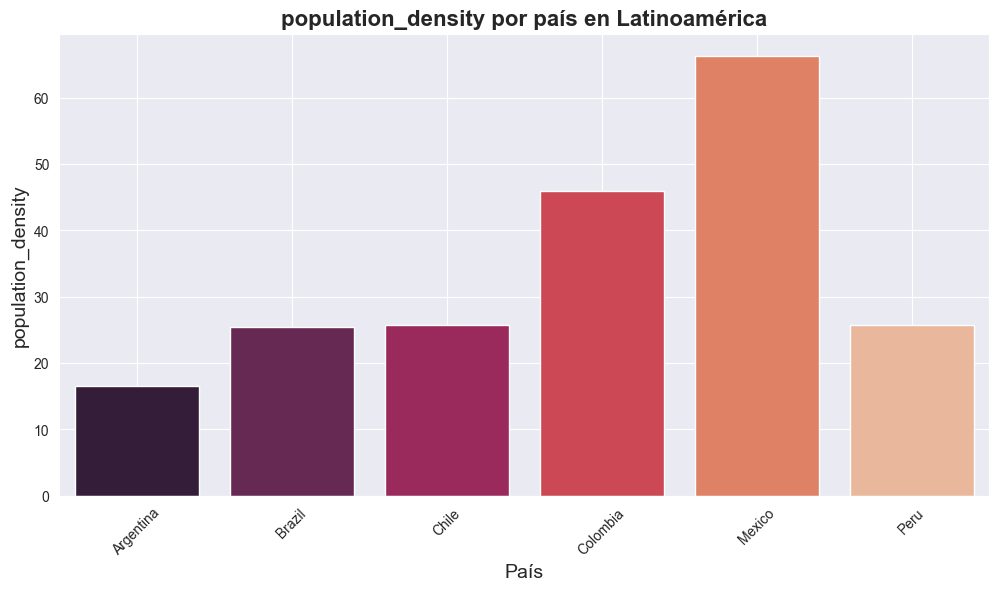

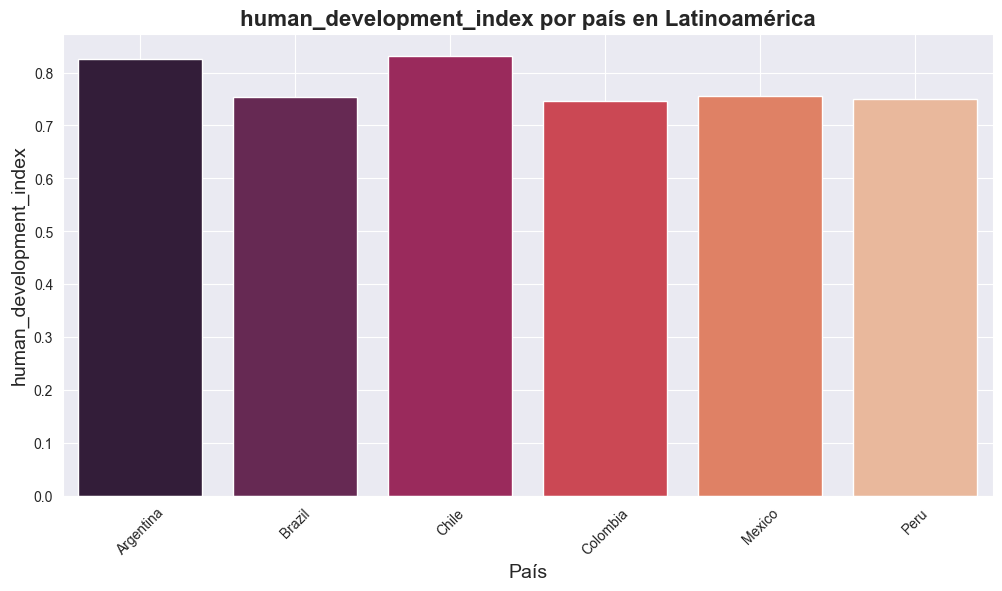

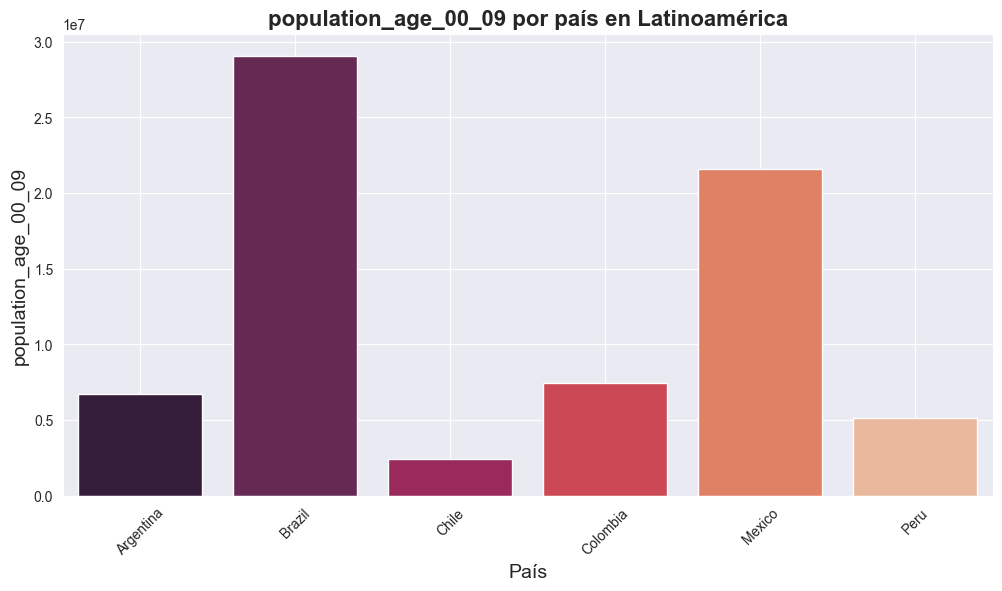

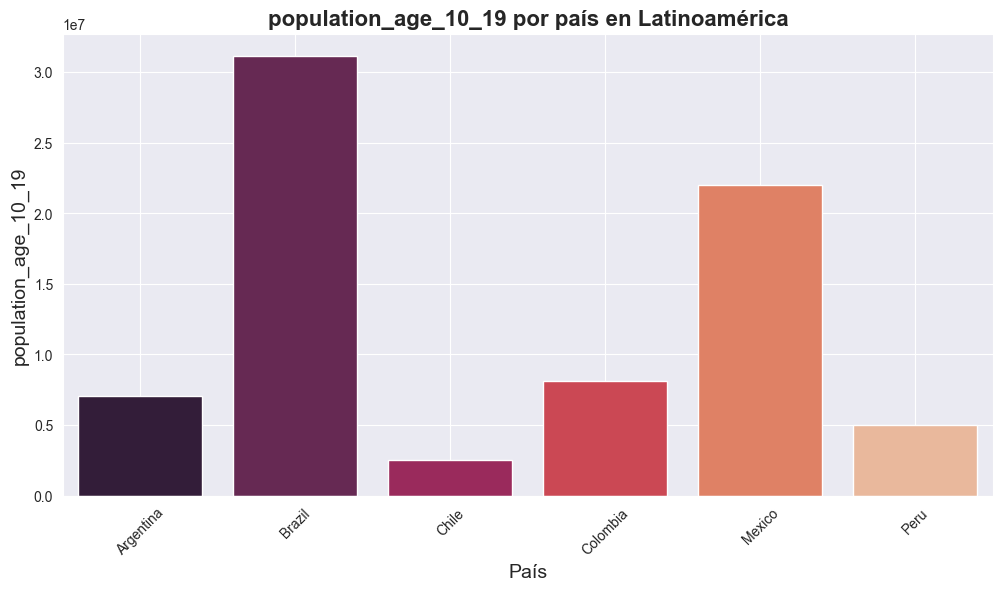

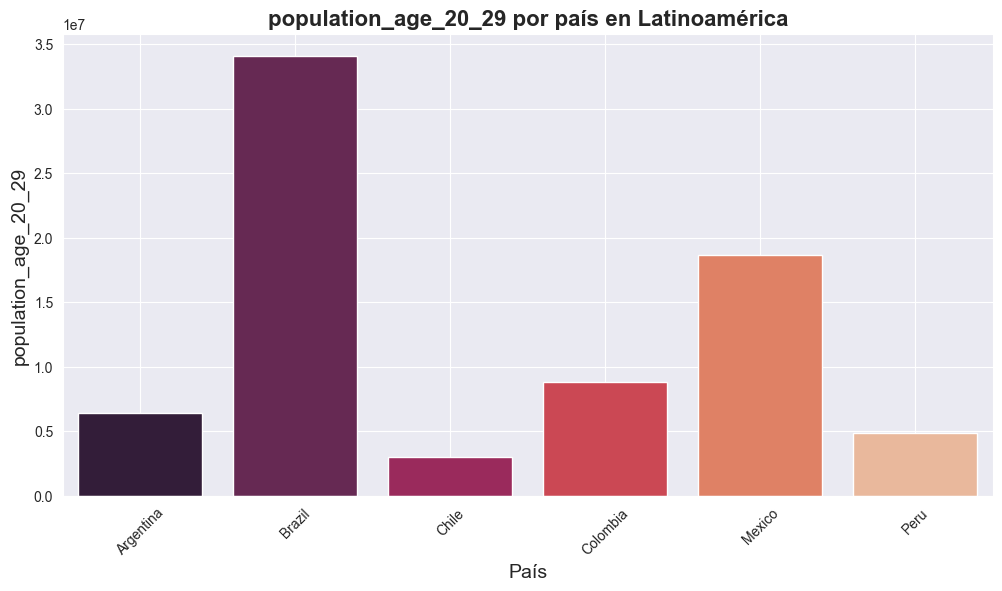

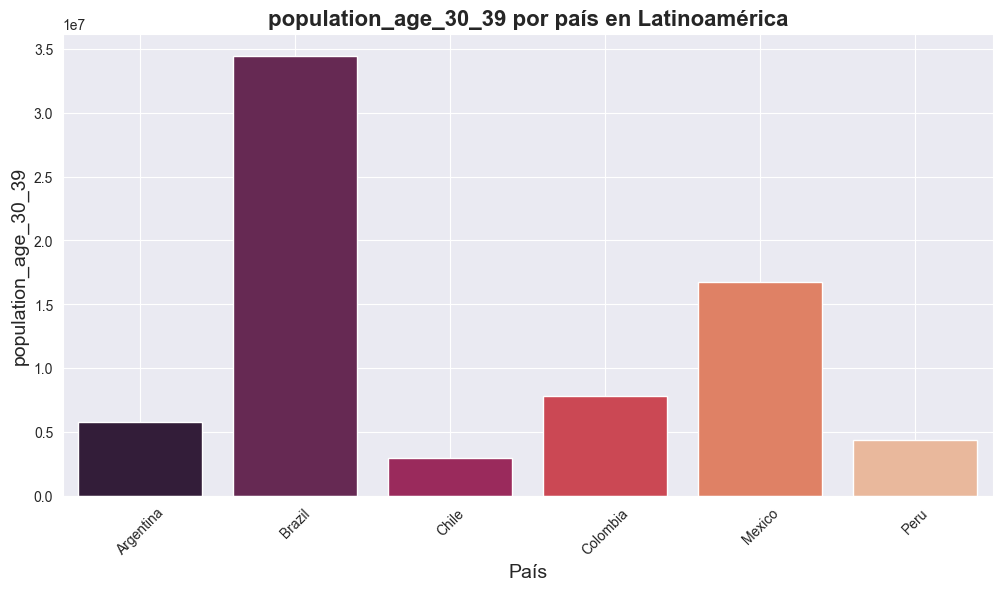

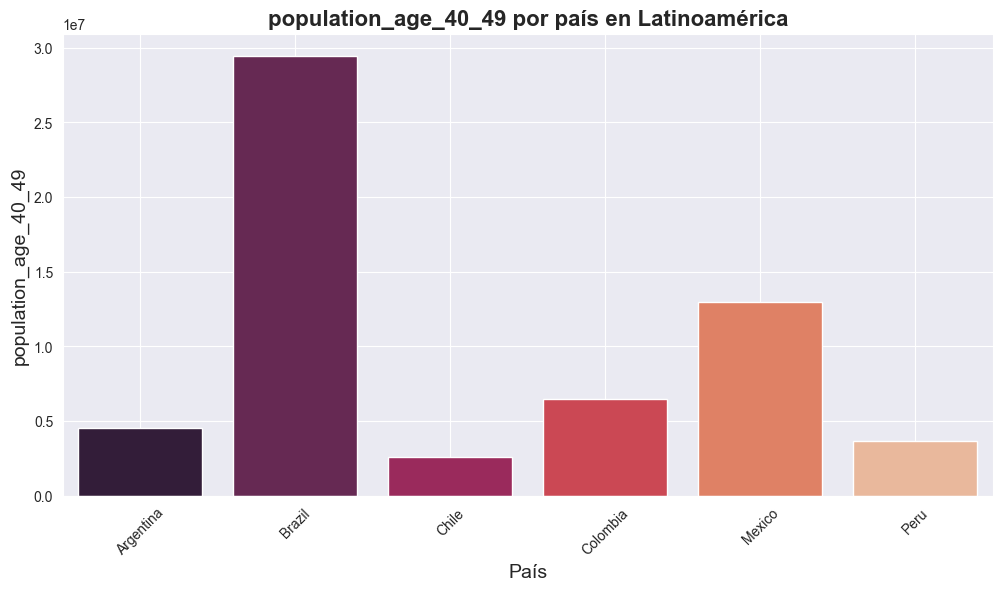

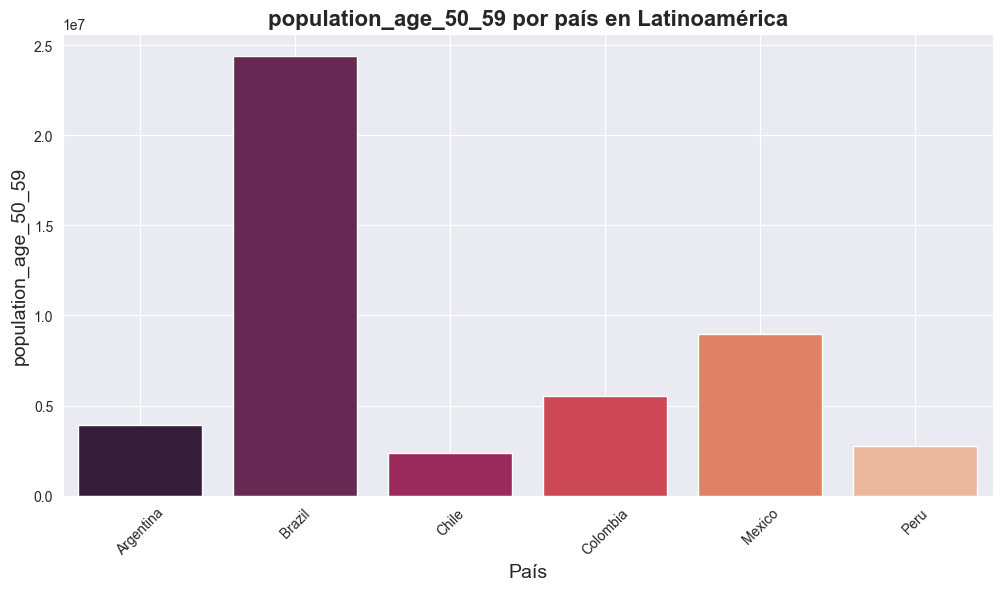

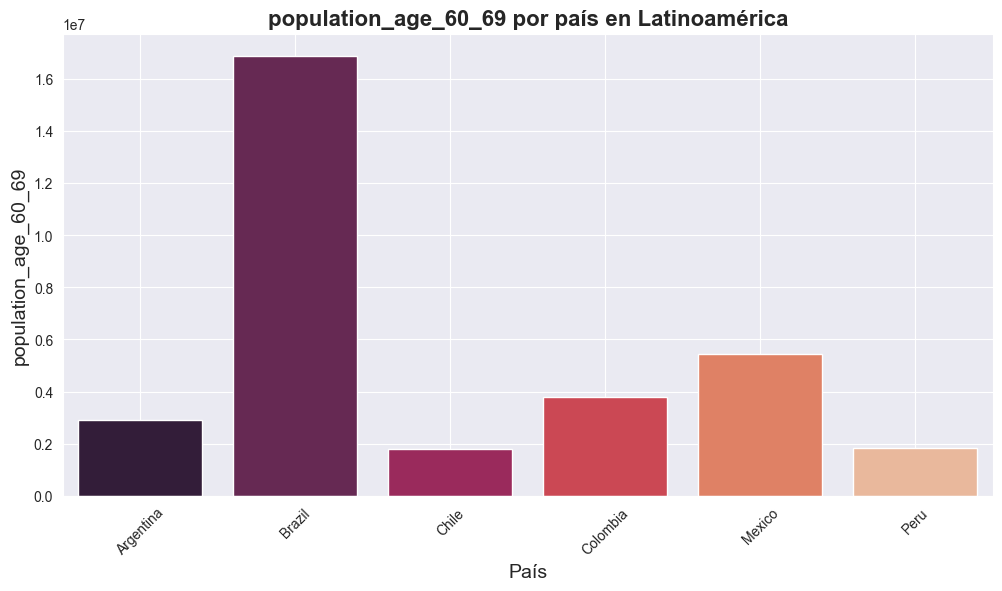

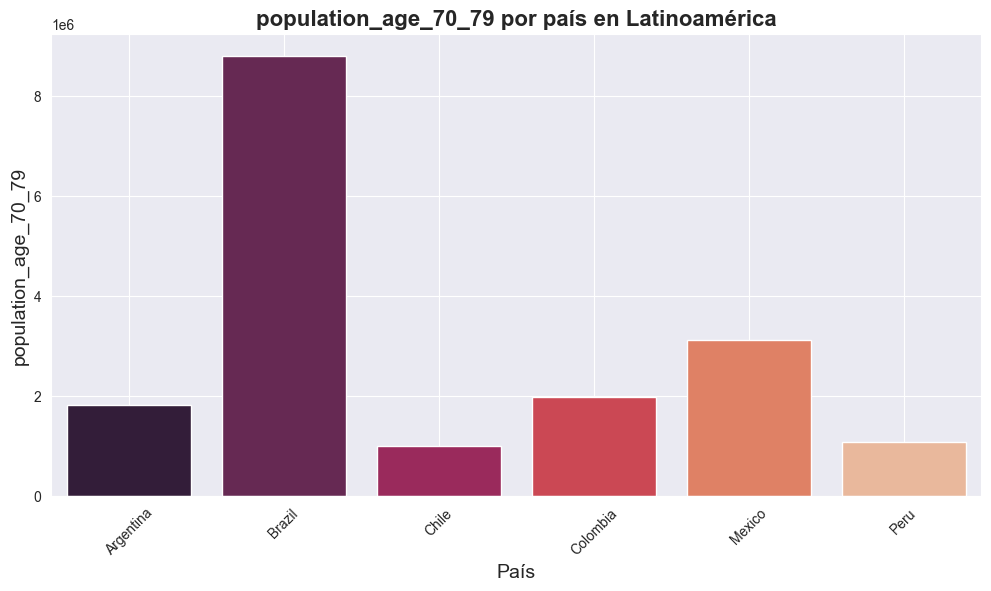

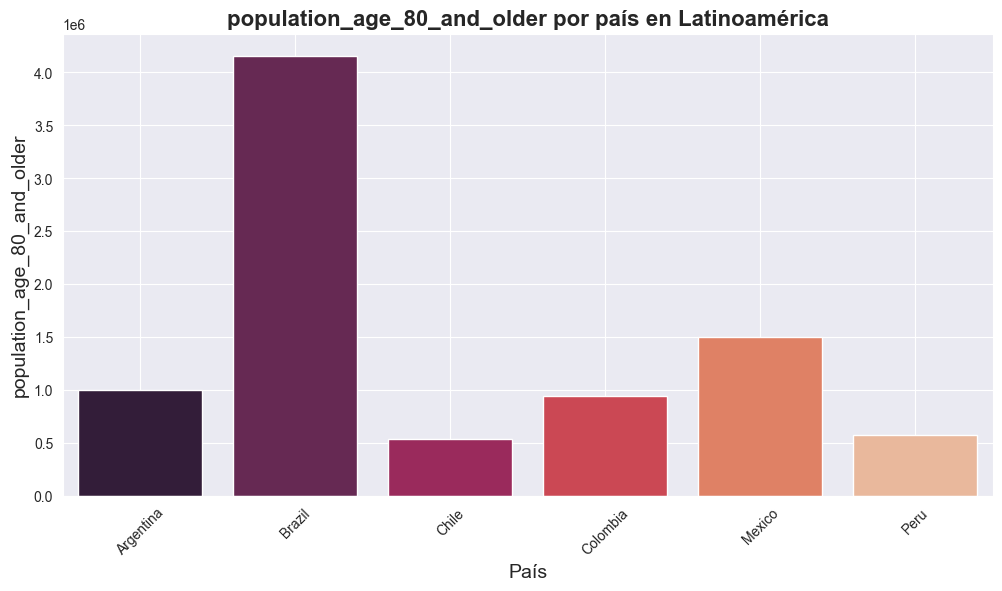

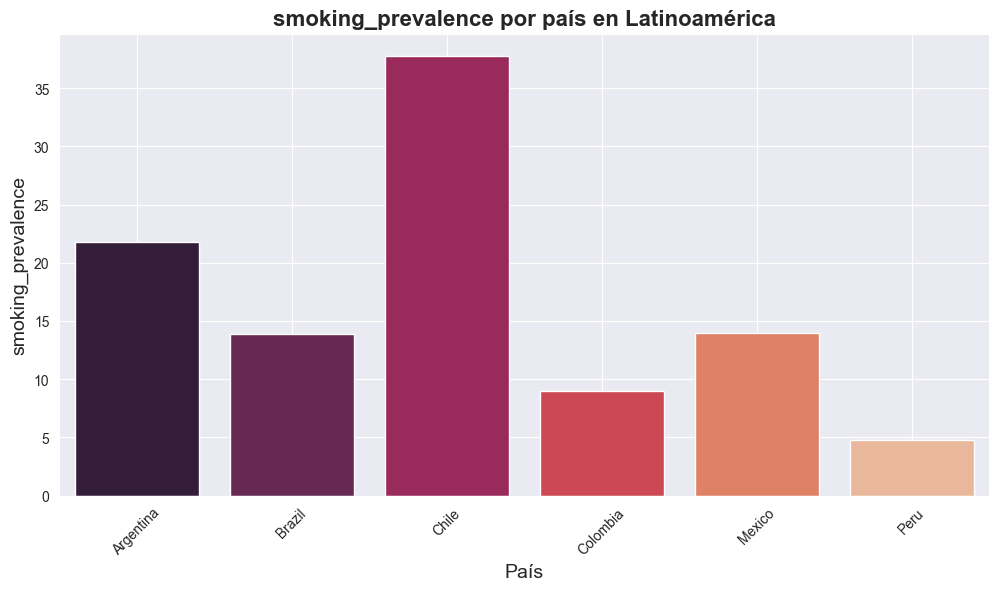

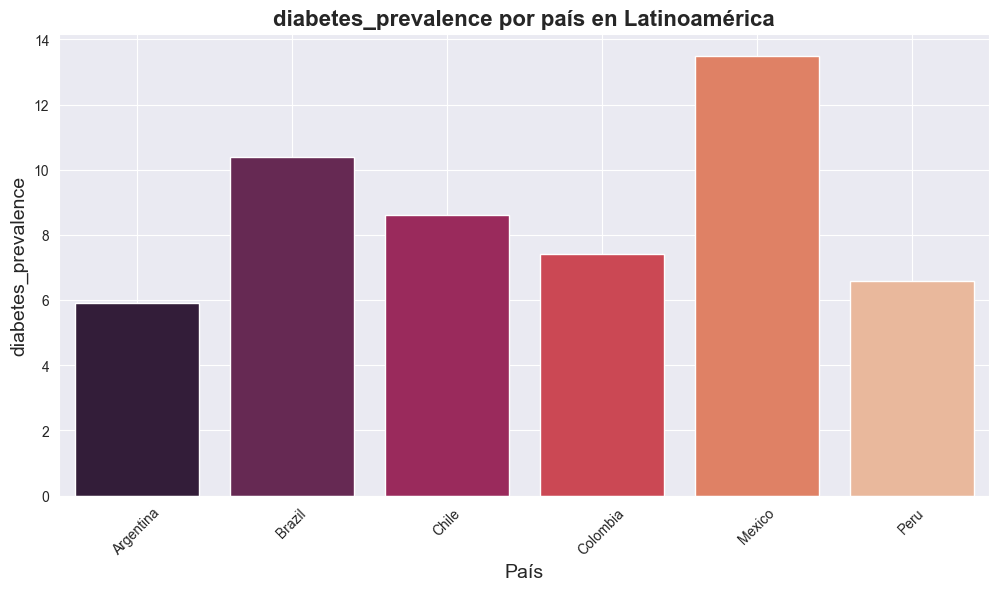

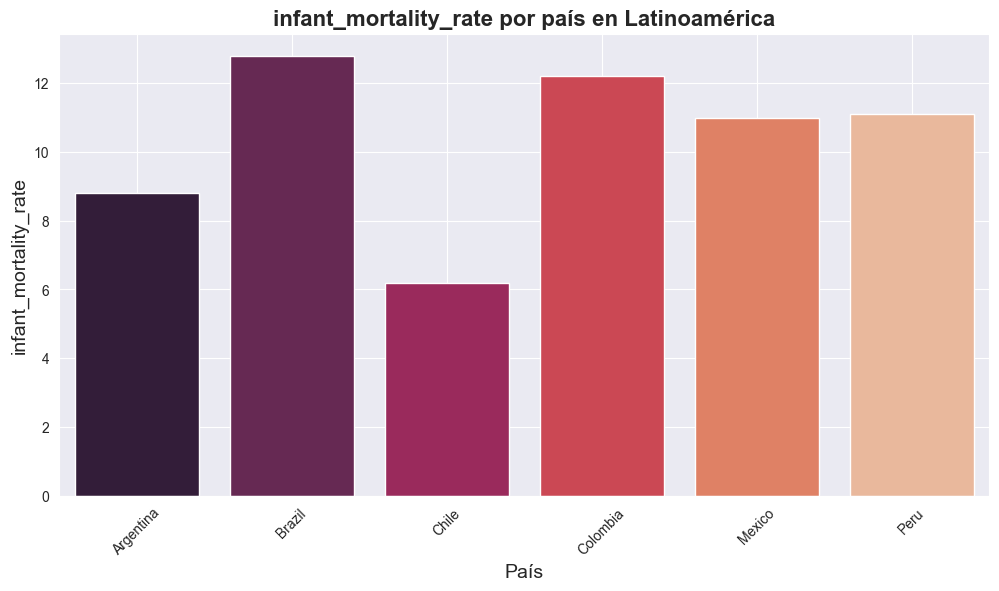

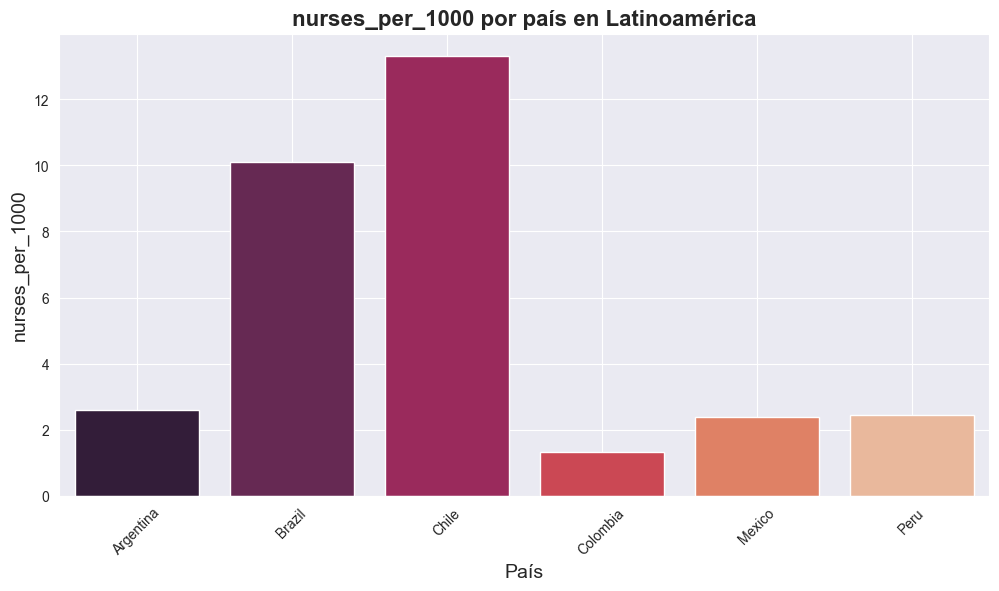

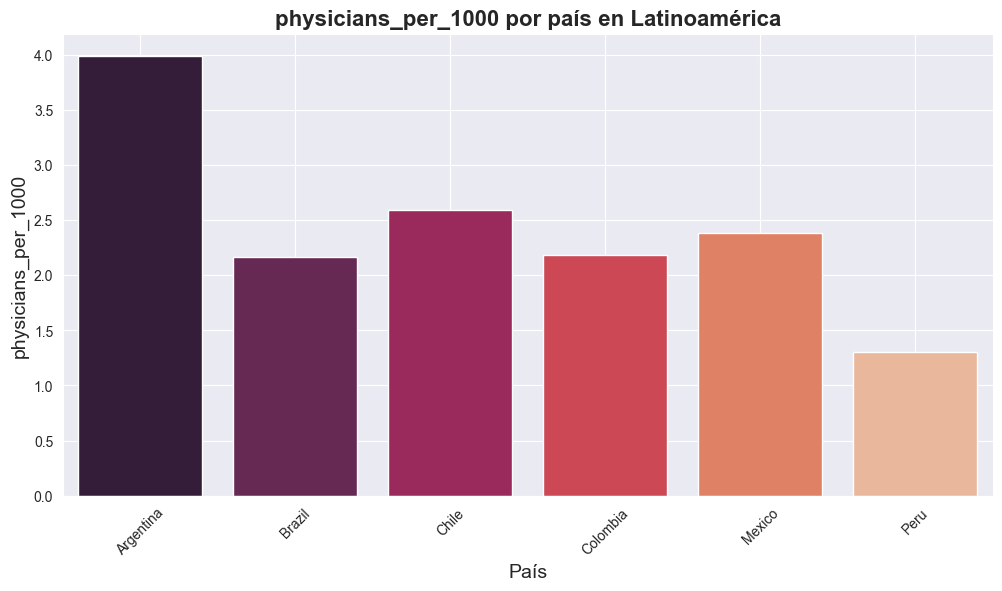

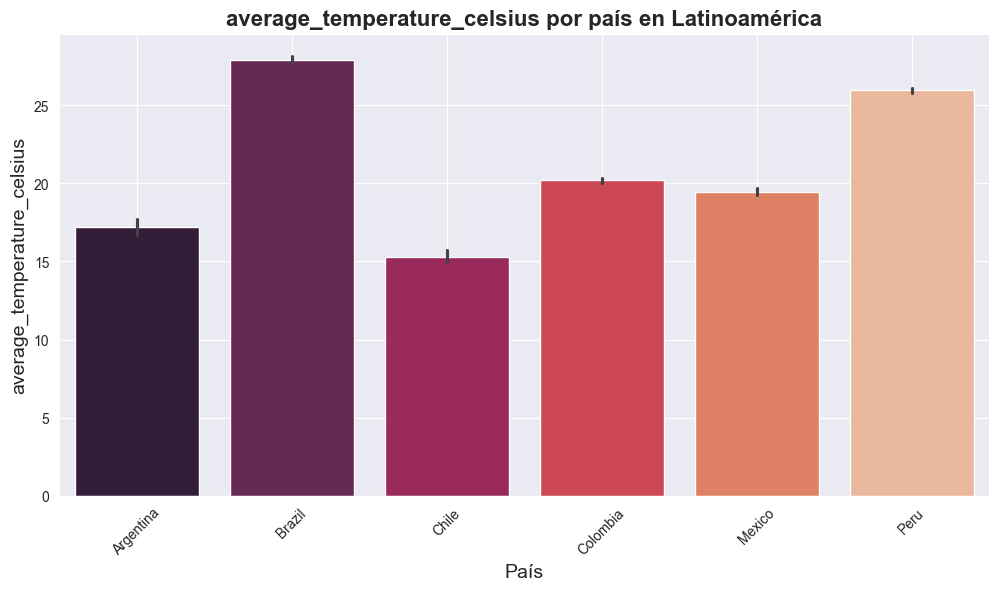

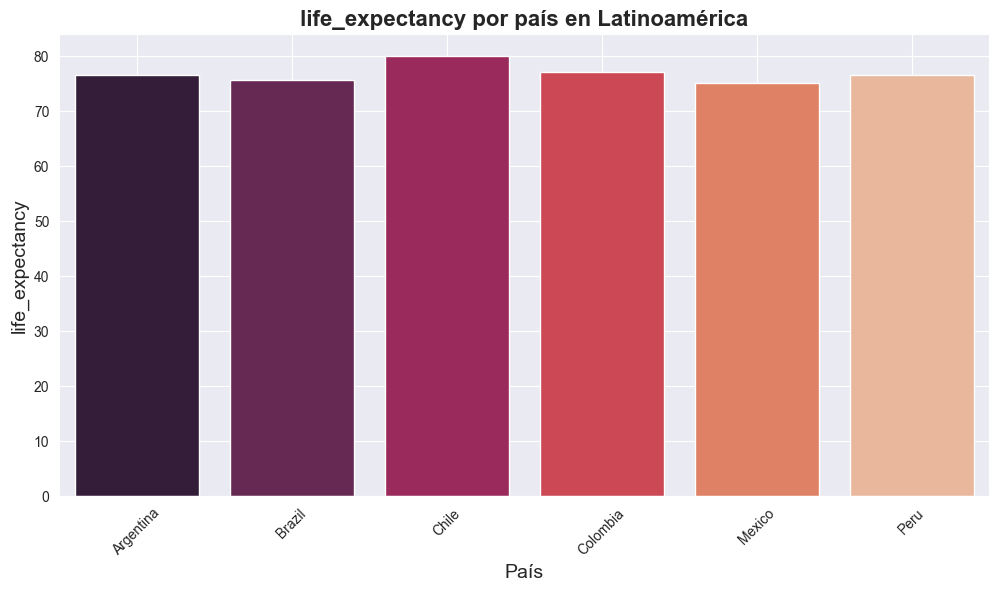

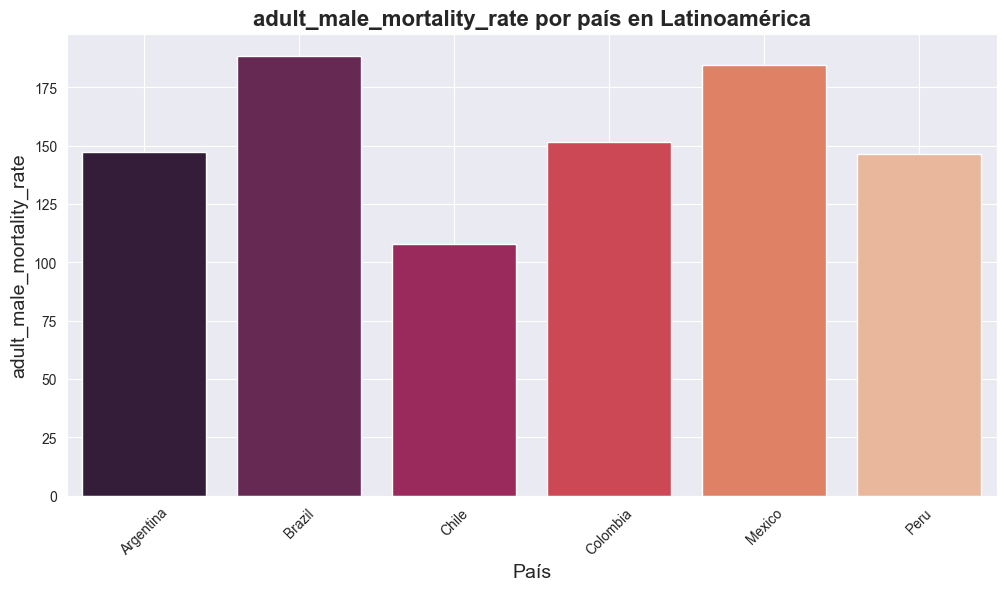

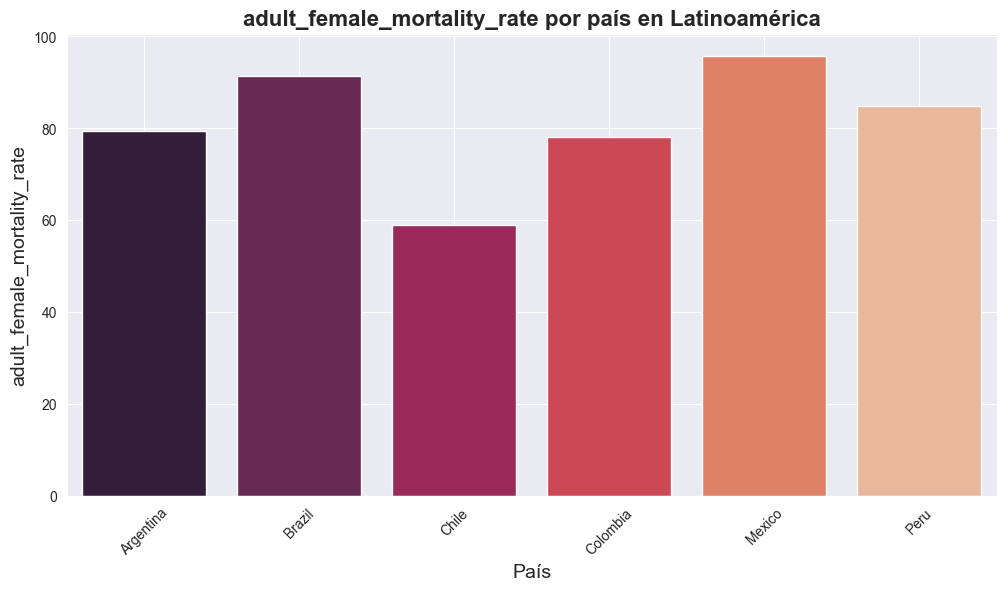

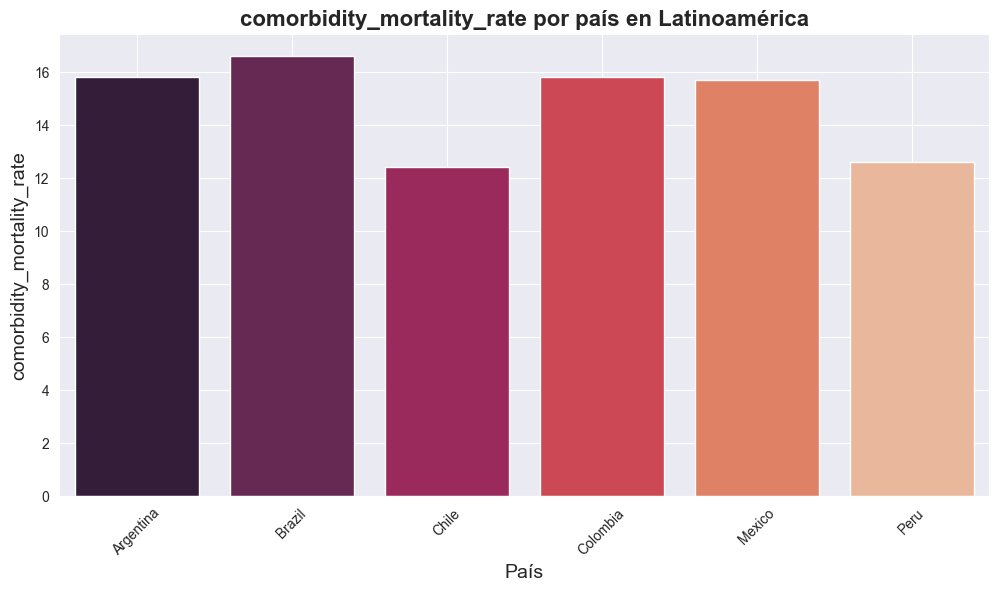

In [23]:
for i in df_av2.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'cumulative_vaccine_doses_administered',
                 'new_recovered']:
        plt.figure(figsize=config_graficos["figsize"])
        sns.barplot(x='country_name', y=i, data=df_av2, hue='country_name')
        configurar_grafico(f'{i} por país en Latinoamérica', 'País', i)
        plt.show()

#### 2. Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.


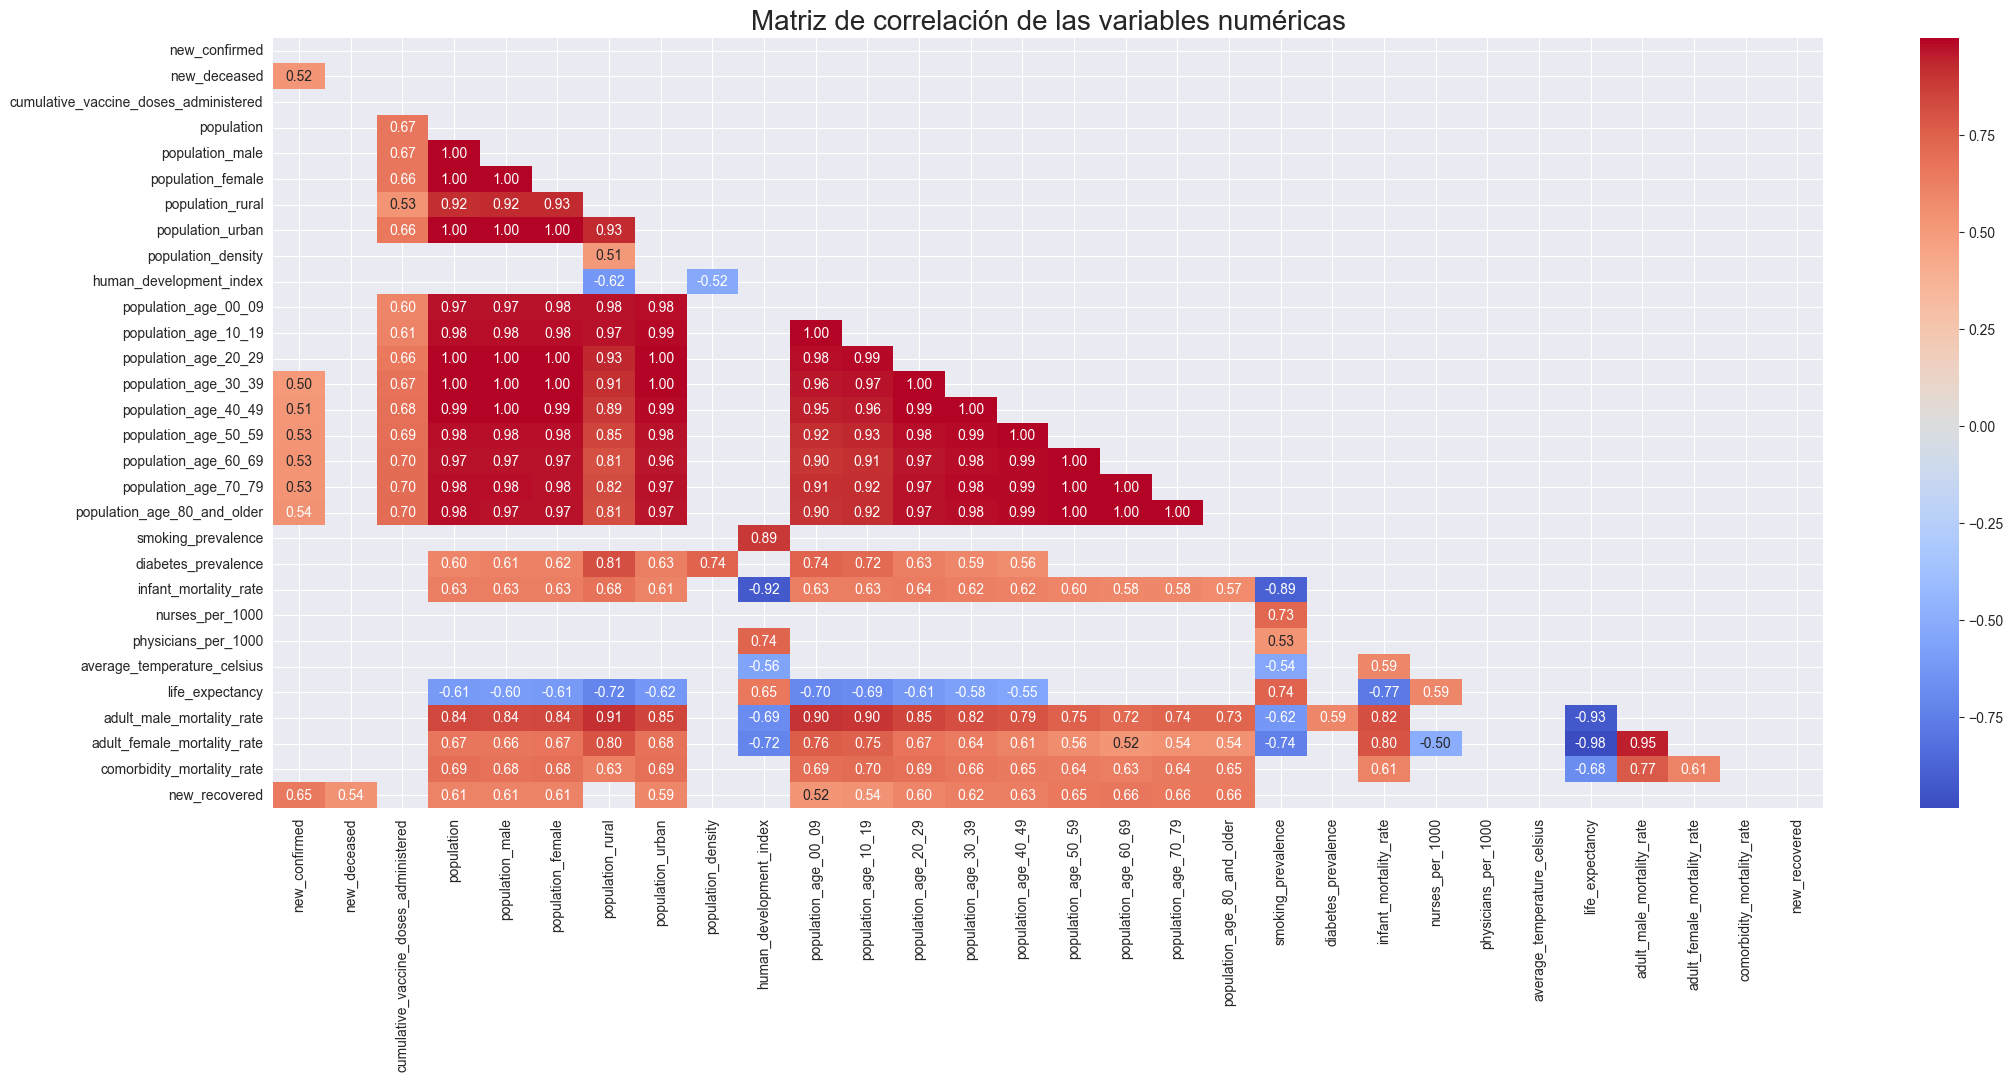

In [ ]:
# Se crea la matriz de correlación de las variables numéricas
numeric_columns = df_av2.select_dtypes(include=['float64','int64']).columns
correlacion_matriz = df_av2[numeric_columns].corr()

# Aqui se crea máscara para el triangulo superior
mask = np.triu(np.ones_like(correlacion_matriz,dtype = bool))

# Vamos a mostrar los valores superiores a 0.5 es decir donde hay una correlacion fuerte sin embargo tambien puede
#mostrar valores negativos.
correlacion_matriz = correlacion_matriz[abs(correlacion_matriz) > abs(0.5)]

plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlacion_matriz, mask=mask,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

En la grafica anterior se presentan las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.


Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis posterior y una toma de decisiones para la creación de un modelo ML.

####  3. Histogramas de las variables que “Sí” tenga cambios de valores.


In [25]:
lista_columnas6 = ['new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius']

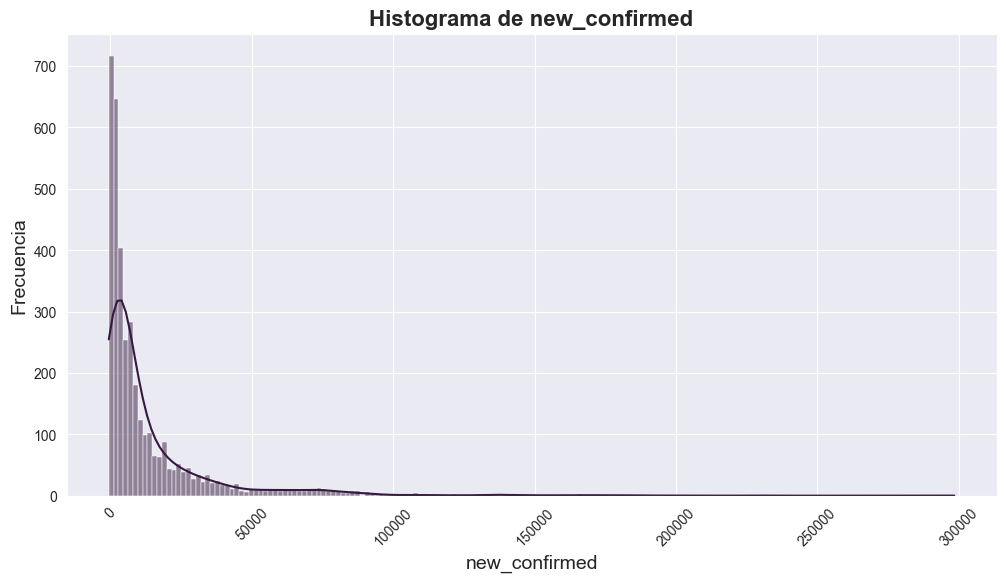

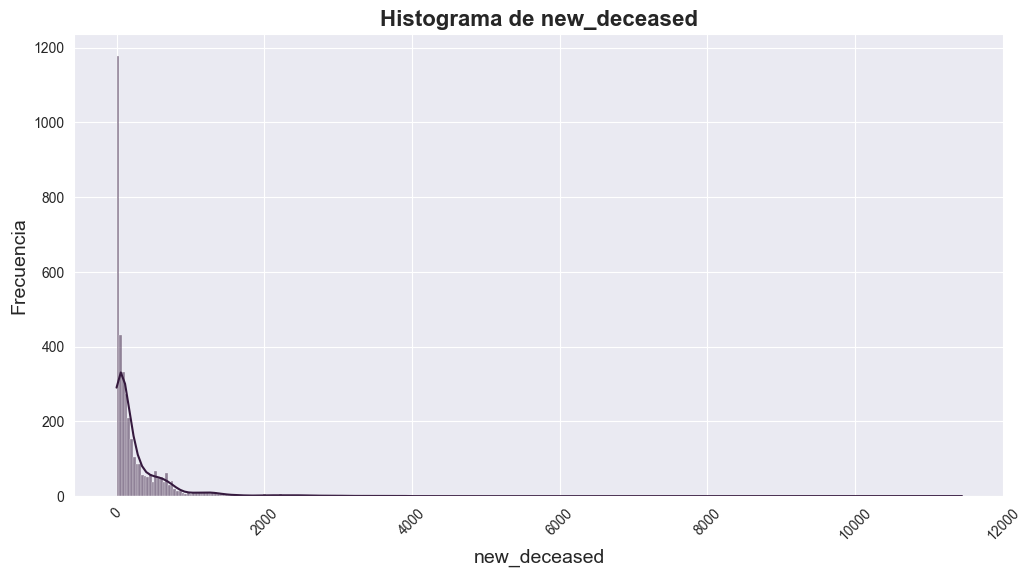

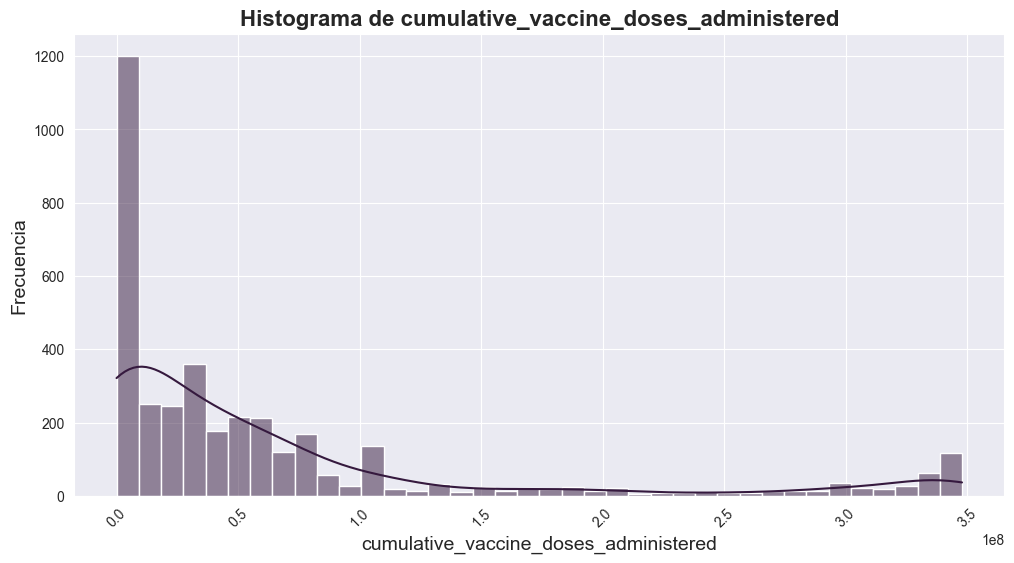

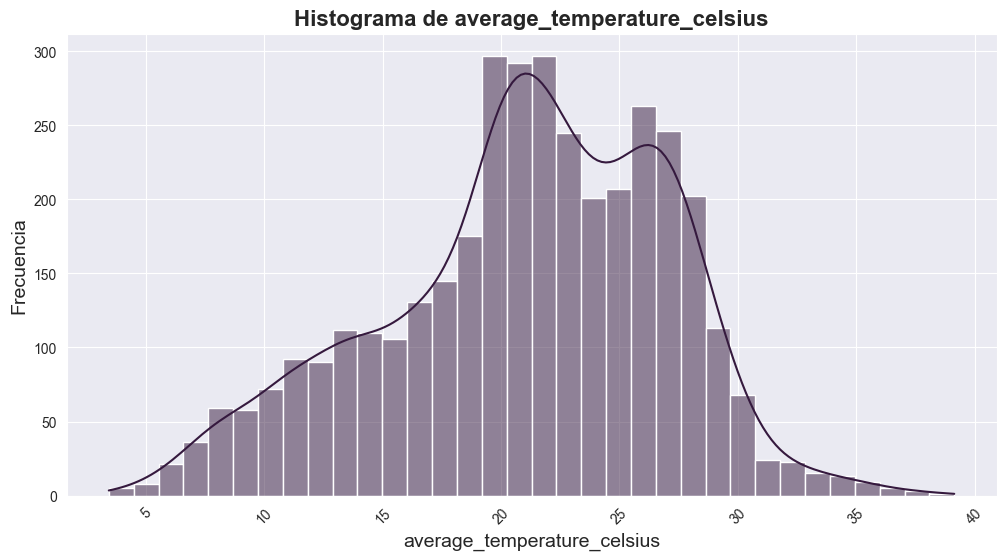

In [26]:
for i in lista_columnas6:
    plt.figure(figsize=config_graficos["figsize"])
    sns.histplot(df_av2[i], kde=True)
    configurar_grafico(f'Histograma de {i}', i, 'Frecuencia')
    plt.show()

#### 4. Diagrama de dispersión de la temperatura media contra los casos confirmados.


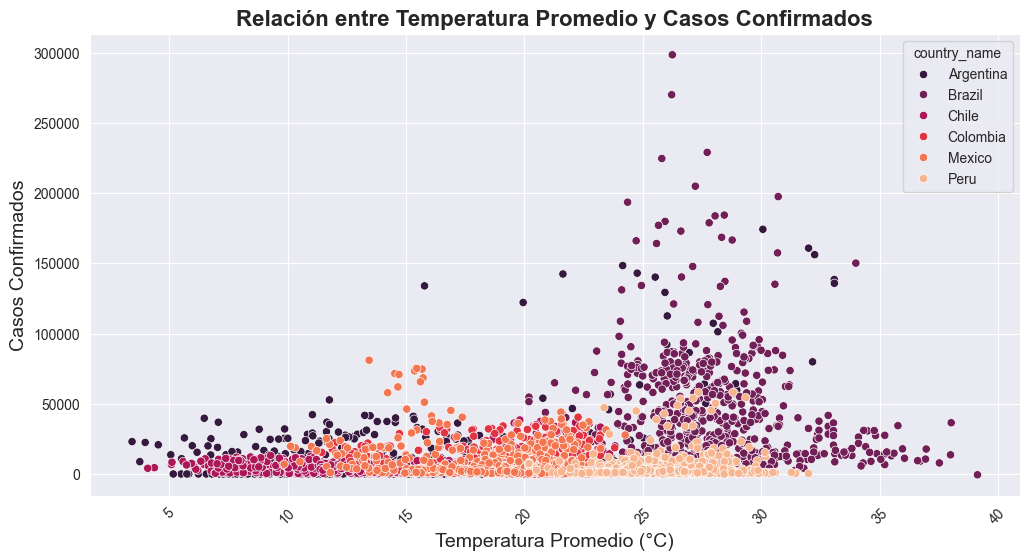

In [27]:
plt.figure(figsize=config_graficos["figsize"])
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df_av2, hue='country_name')
configurar_grafico('Relación entre Temperatura Promedio y Casos Confirmados', 'Temperatura Promedio (°C)', 'Casos Confirmados')
plt.show()

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.


#### 5. Diagrama de dispersión de la temperatura media contra las muertes confirmadas.


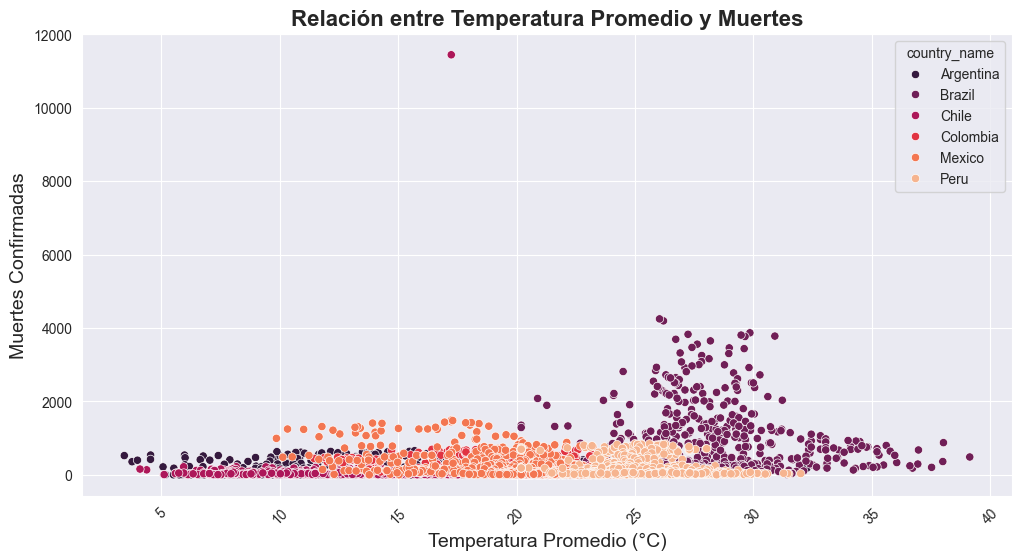

In [28]:
plt.figure(figsize=config_graficos["figsize"])
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=df_av2, hue='country_name')
configurar_grafico('Relación entre Temperatura Promedio y Muertes', 'Temperatura Promedio (°C)', 'Muertes Confirmadas')
plt.show()

#### 6. Comportamiento de las dosis administradas de todos los países (Valor medio).  --


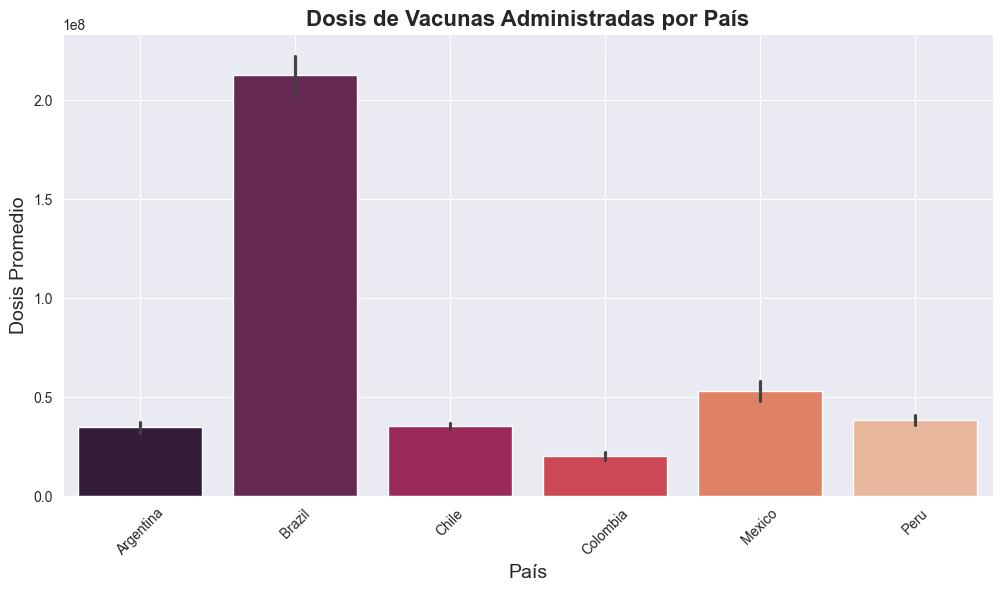

In [29]:
plt.figure(figsize=config_graficos["figsize"])
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_av2, estimator=np.mean, hue='country_name', legend=False)
configurar_grafico('Dosis de Vacunas Administradas por País', 'País', 'Dosis Promedio')
plt.show()

#### 7. Evolución de dosis administradas por mes de cada país.


In [30]:
df_av2 = df_av2.reset_index()

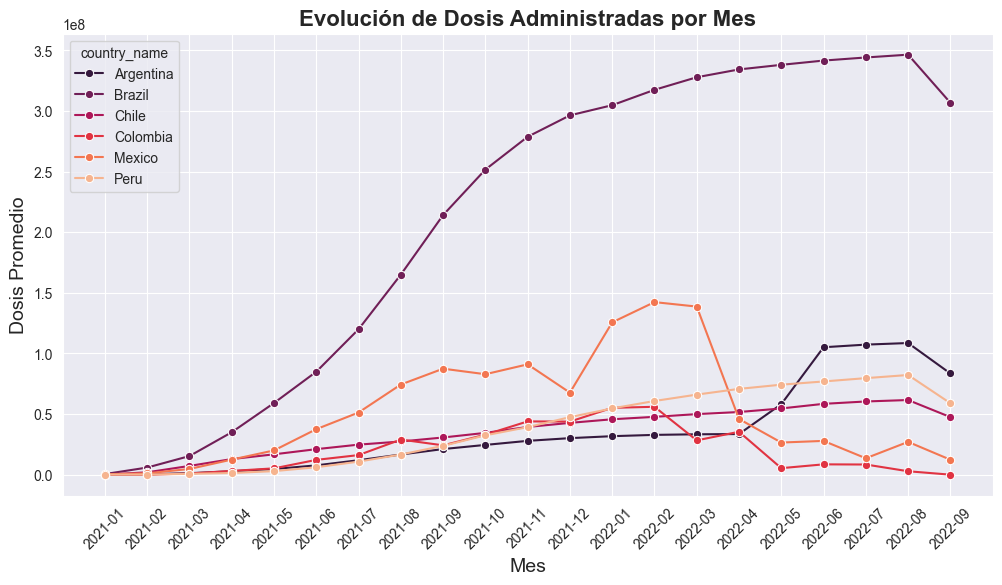

In [31]:
df_av2['month'] = df_av2['date'].dt.to_period('M')
dosis_mes = df_av2.groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered'].mean().reset_index()
dosis_mes['month'] = dosis_mes['month'].astype(str)
plt.figure(figsize=config_graficos["figsize"])
sns.lineplot(x='month', y='cumulative_vaccine_doses_administered', hue='country_name', data=dosis_mes, marker='o')
configurar_grafico('Evolución de Dosis Administradas por Mes', 'Mes', 'Dosis Promedio')
plt.show()

#### 8. Distribución de muertes por país 


C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\2235379053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='country_name', y='new_deceased', data=df_av2,


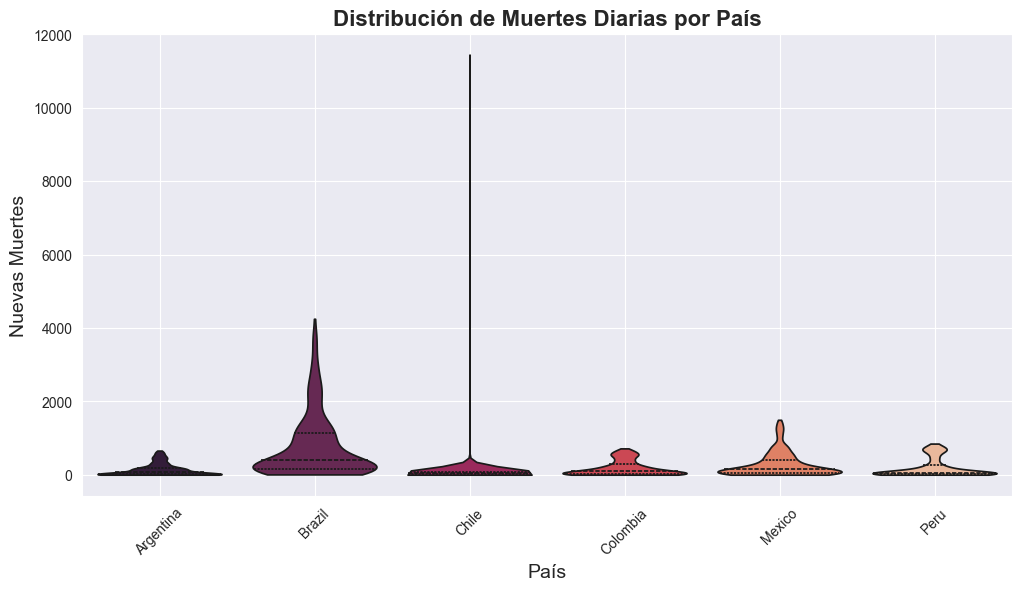

In [32]:
plt.figure(figsize=config_graficos["figsize"])
sns.violinplot(x='country_name', y='new_deceased', data=df_av2, 
               palette=config_graficos["palette"], inner="quartile",
               cut=0)
configurar_grafico('Distribución de Muertes Diarias por País', 'País', 'Nuevas Muertes')
plt.show()

#### 9. Evolución de Casos Confirmados por Mes

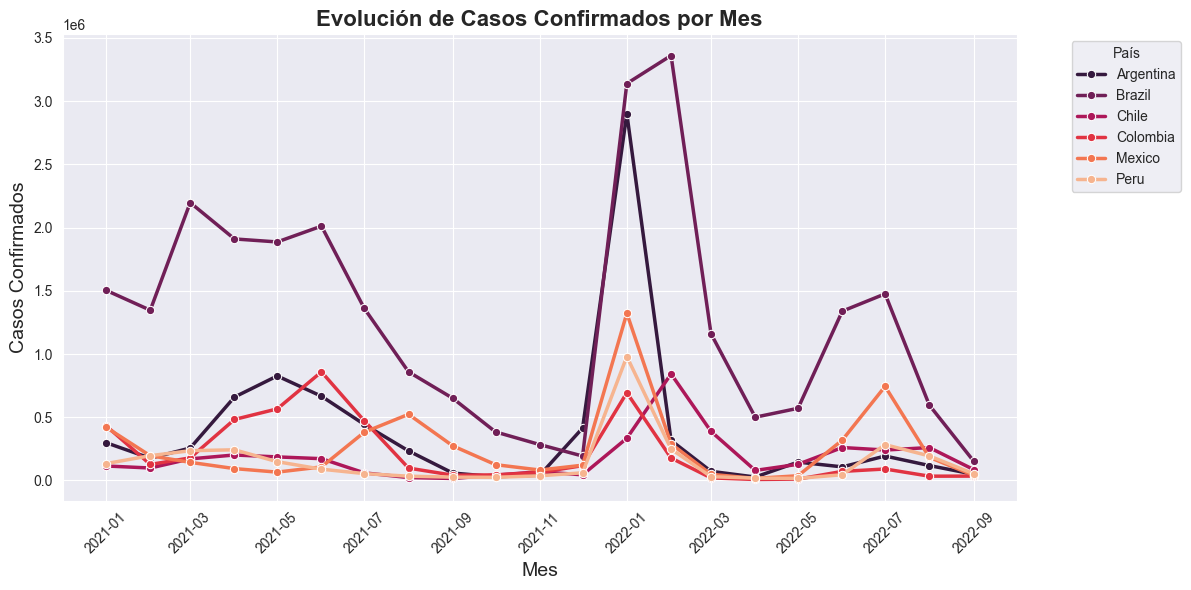

In [33]:
df_av2['month_only'] = df_av2['date'].dt.to_period('M').dt.to_timestamp()

casos_mes = df_av2.groupby(['country_name', 'month_only'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=config_graficos["figsize"])
sns.lineplot(x='month_only', y='new_confirmed', hue='country_name', 
             data=casos_mes, marker='o', linewidth=2.5)
configurar_grafico('Evolución de Casos Confirmados por Mes', 'Mes', 'Casos Confirmados')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 10. Recuperaciones de casos por mes de cada país

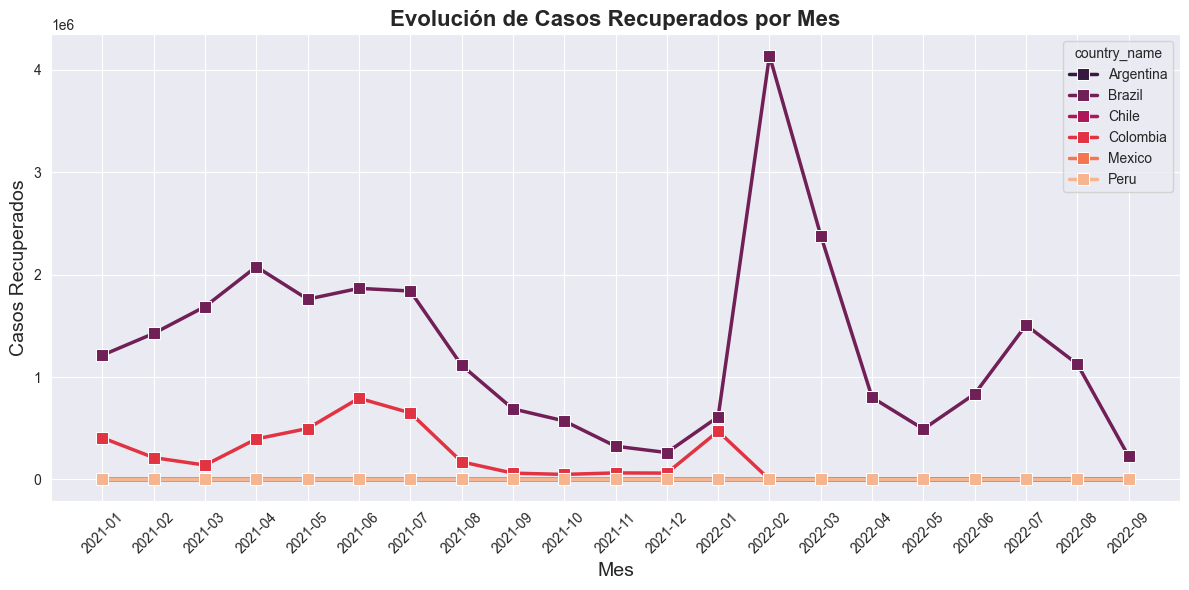

In [34]:
recuperados_mes = df_av2.groupby(['country_name', 'month'])['new_recovered'].sum().reset_index()
recuperados_mes['month_str'] = recuperados_mes['month'].astype(str)  # Convertir a string

plt.figure(figsize=config_graficos["figsize"])
sns.lineplot(x='month_str', y='new_recovered', hue='country_name', 
             data=recuperados_mes, marker='s', style='country_name',
             dashes=False, markersize=8, linewidth=2.5)
configurar_grafico('Evolución de Casos Recuperados por Mes', 'Mes', 'Casos Recuperados')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

#### 11. Dosis acumuladas por país


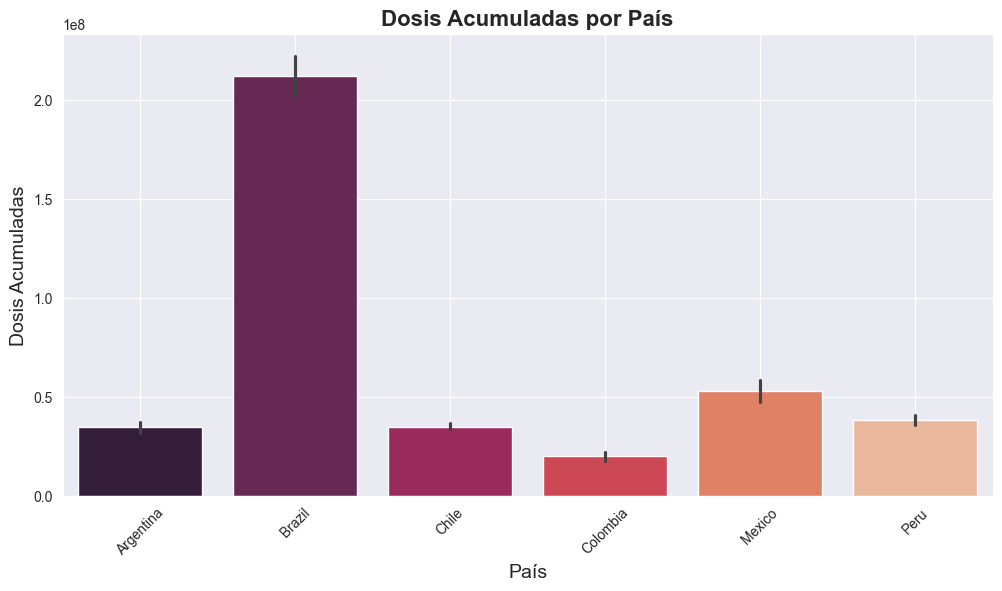

In [35]:
plt.figure(figsize=config_graficos["figsize"])
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_av2, hue='country_name', legend=False)
configurar_grafico('Dosis Acumuladas por País', 'País', 'Dosis Acumuladas')
plt.show()

####  12. Boxplot de temperatura media de cada país.


C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\1077818343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country_name', y='average_temperature_celsius',


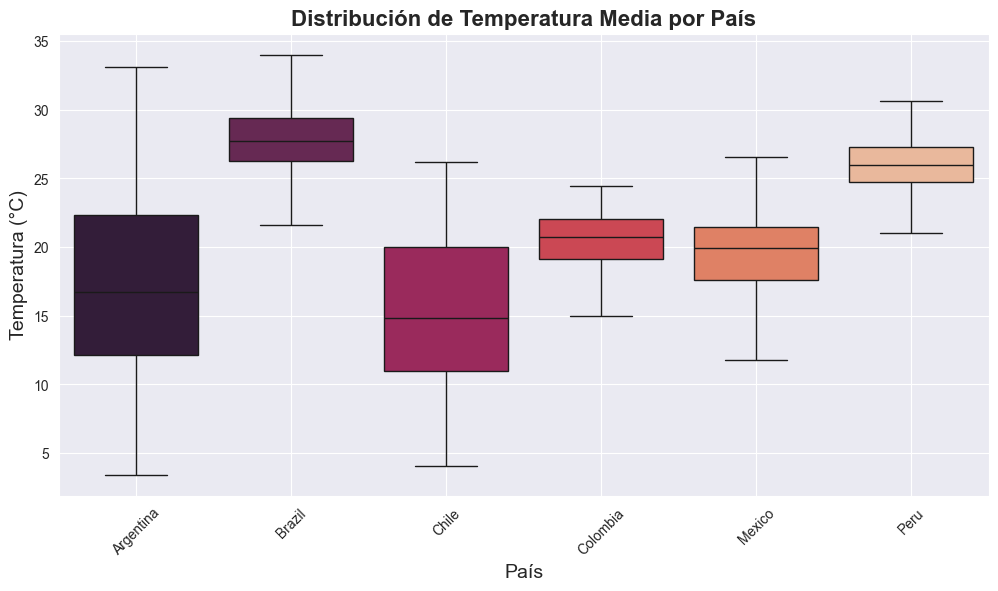

In [36]:
plt.figure(figsize=config_graficos["figsize"])
sns.boxplot(x='country_name', y='average_temperature_celsius', 
            data=df_av2, palette=config_graficos["palette"],
            showfliers=False)
configurar_grafico('Distribución de Temperatura Media por País', 'País', 'Temperatura (°C)')
plt.show()

####   14. Mapa de calor de Métricas por país.


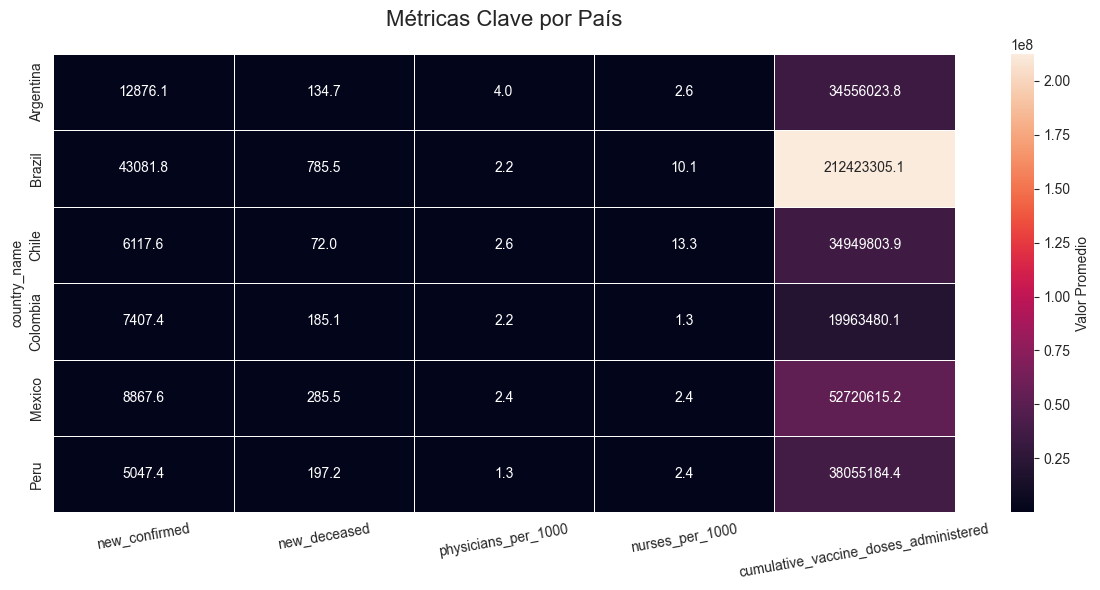

In [37]:
metricas_pais = df_av2.groupby('country_name').agg({
    'new_confirmed': 'mean',
    'new_deceased': 'mean',
    'physicians_per_1000': 'mean',
    'nurses_per_1000': 'mean',
    'cumulative_vaccine_doses_administered': 'mean'
}).reset_index()

plt.figure(figsize=config_graficos["figsize"])
sns.heatmap(metricas_pais.set_index('country_name'), 
            annot=True, fmt=".1f", cmap='rocket',
            linewidths=.5, cbar_kws={'label': 'Valor Promedio'})
plt.title('Métricas Clave por País', fontsize=16, pad=20)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

####   15. Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.


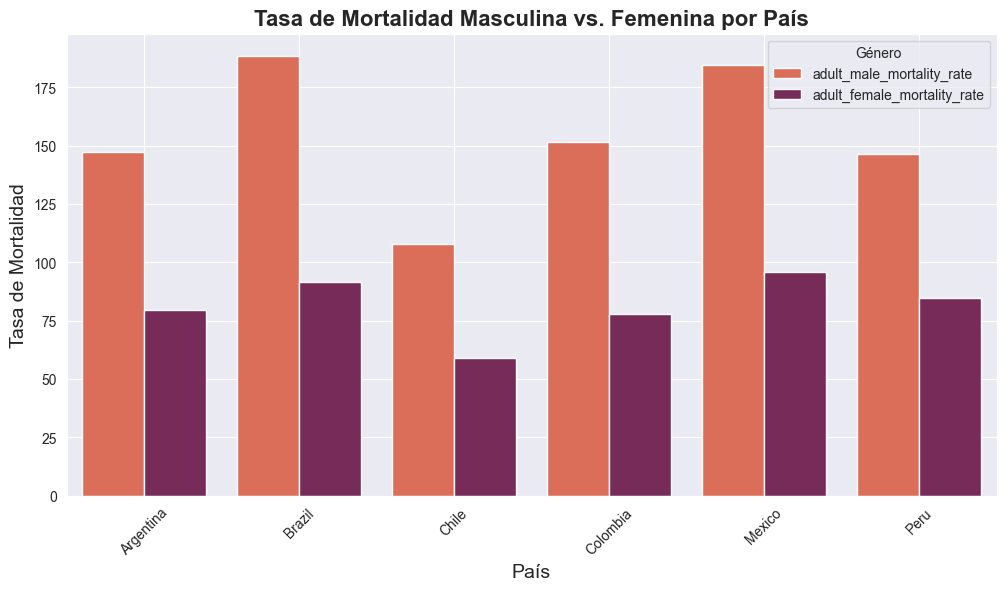

In [38]:
df_mortality = df_av2.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean().reset_index()

df_mortality_melted = df_mortality.melt(id_vars='country_name', value_vars=['adult_male_mortality_rate', 'adult_female_mortality_rate'], 
                                        var_name='Género', value_name='Tasa de Mortalidad')

plt.figure(figsize=config_graficos["figsize"])
sns.barplot(x='country_name', y='Tasa de Mortalidad', hue='Género', data=df_mortality_melted, palette='rocket_r')
configurar_grafico('Tasa de Mortalidad Masculina vs. Femenina por País', 'País','Tasa de Mortalidad')

plt.show()

#### 16. Relación entre Vacunación y Casos Confirmados


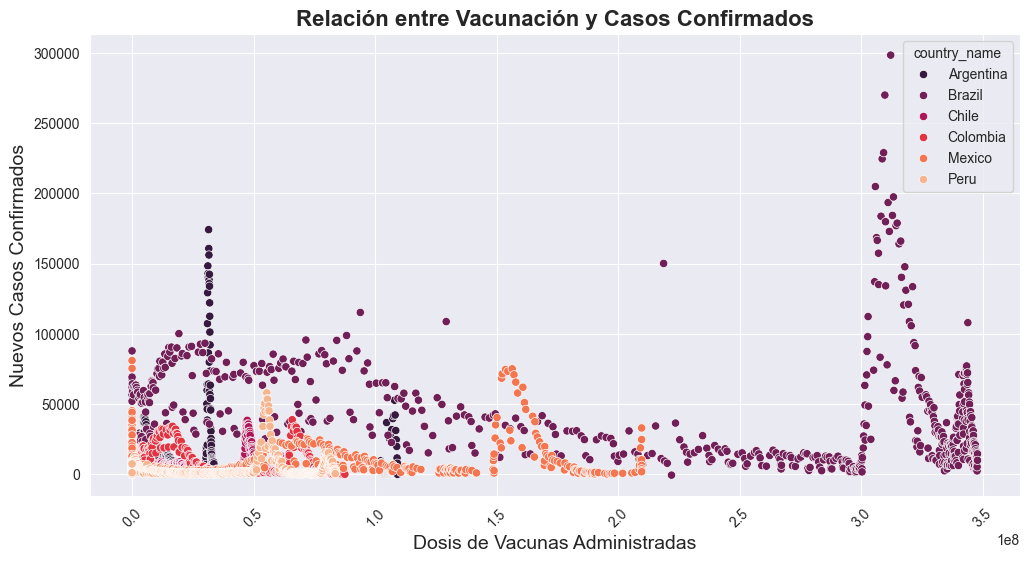

In [39]:
plt.figure(figsize=config_graficos["figsize"])
sns.scatterplot(x='cumulative_vaccine_doses_administered', y='new_confirmed', hue='country_name', data=df_av2, palette='rocket')
configurar_grafico('Relación entre Vacunación y Casos Confirmados', 'Dosis de Vacunas Administradas','Nuevos Casos Confirmados')
plt.show()

#### 17. Distribución de Nuevos Casos Confirmados de COVID-19

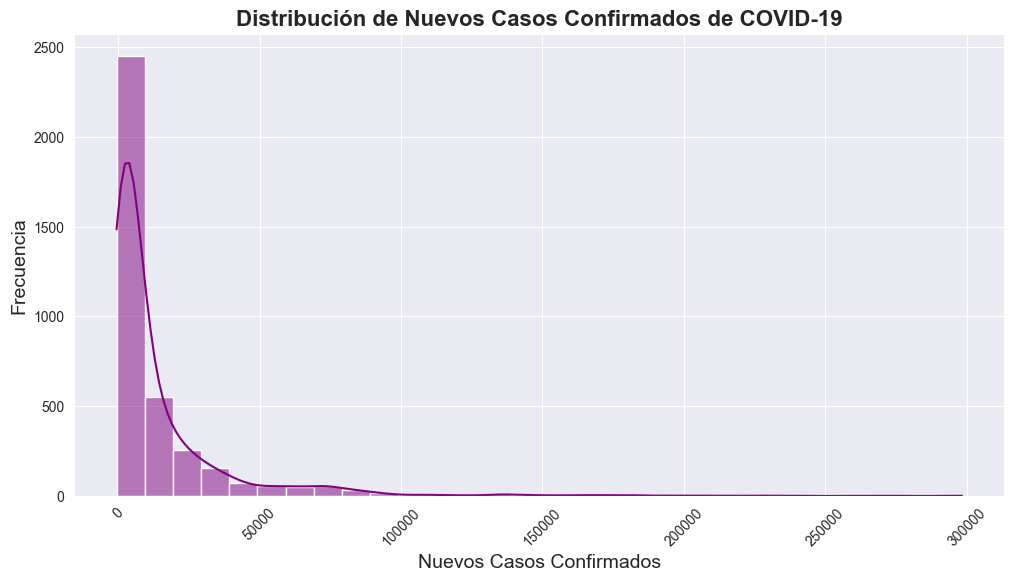

In [40]:
plt.figure(figsize=config_graficos["figsize"])
sns.histplot(df_av2['new_confirmed'], bins=30, kde=True, color='purple')
configurar_grafico('Distribución de Nuevos Casos Confirmados de COVID-19','Nuevos Casos Confirmados','Frecuencia')
plt.show()

#### 18. Impacto de la Urbanización en la Propagación del COVID-19


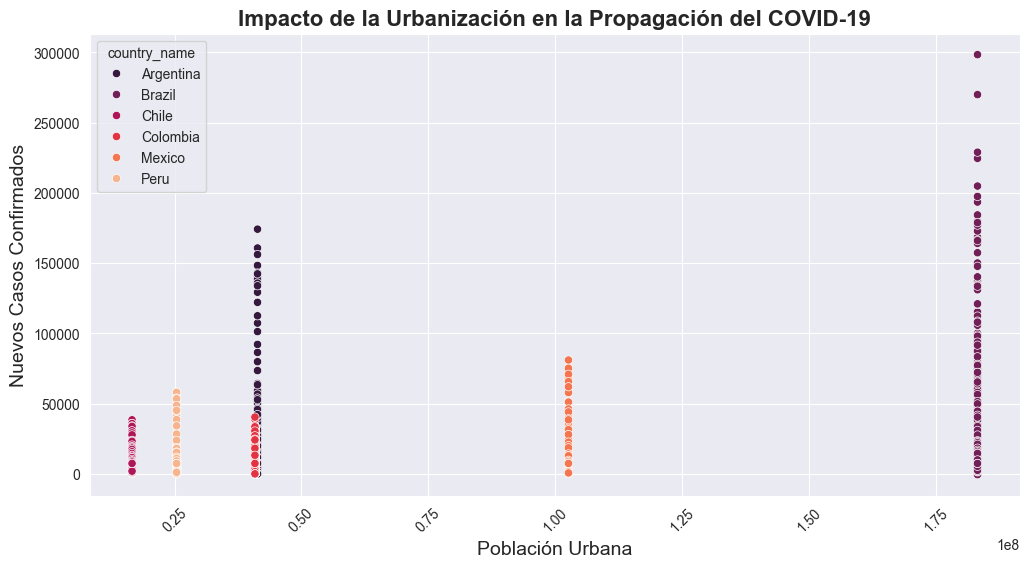

In [41]:
plt.figure(figsize=config_graficos["figsize"])
sns.scatterplot(x='population_urban', y='new_confirmed', hue='country_name', data=df_av2, palette='rocket')
configurar_grafico('Impacto de la Urbanización en la Propagación del COVID-19','Población Urbana','Nuevos Casos Confirmados')
plt.show()

#### 19. Progreso de la Vacunación por País

C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\1152648897.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_av2, estimator=max, ci=None, palette='rocket')
C:\Users\gonza\AppData\Local\Temp\ipykernel_29544\1152648897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_av2, estimator=max, ci=None, palette='rocket')


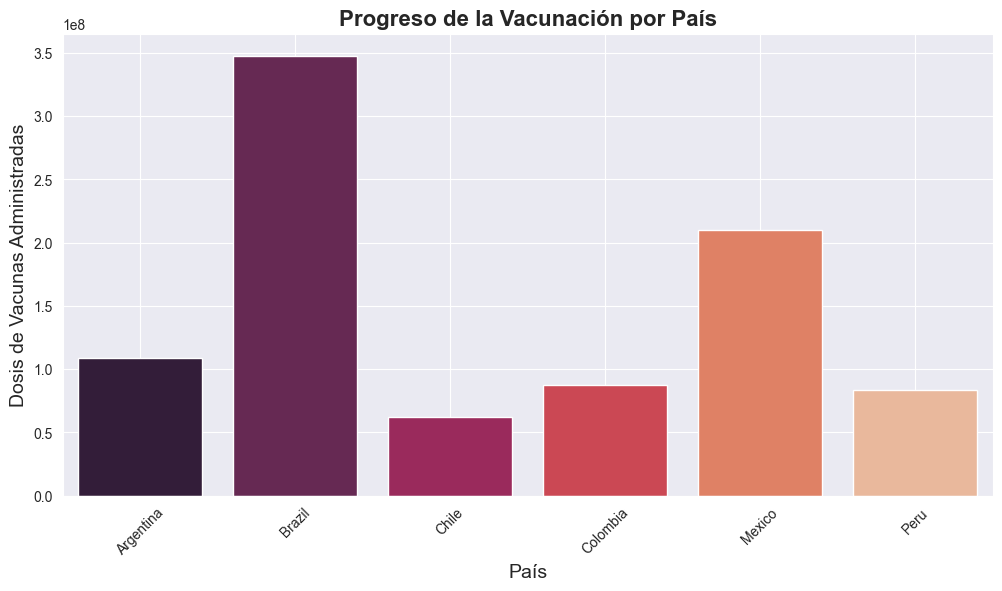

In [42]:
plt.figure(figsize=config_graficos["figsize"])
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_av2, estimator=max, ci=None, palette='rocket')
configurar_grafico('Progreso de la Vacunación por País','País','Dosis de Vacunas Administradas')
plt.show()

# 3° avance EDA con Numpy y Pandas

In [43]:
df_av2

date location_key country_code country_name  new_confirmed  \
0    2021-01-02           AR           AR    Argentina    7767.000000   
1    2021-01-03           AR           AR    Argentina    4934.000000   
2    2021-01-04           AR           AR    Argentina   13953.000000   
3    2021-01-05           AR           AR    Argentina   14085.000000   
4    2021-01-06           AR           AR    Argentina   14496.000000   
...         ...          ...          ...          ...            ...   
3739 2022-09-13           PE           PE         Peru    1150.000000   
3740 2022-09-14           PE           PE         Peru    7407.414516   
3741 2022-09-15           PE           PE         Peru    7407.414516   
3742 2022-09-16           PE           PE         Peru    7407.414516   
3743 2022-09-17           PE           PE         Peru    7407.414516   

      new_deceased  cumulative_vaccine_doses_administered  population  \
0       166.000000                                20334.0  44938712.0   
1       157.000000                                20529.0  44938712.0   
2       157.000000                                25164.0  44938712.0   
3       160.000000                                29852.0  44938712.0   
4       131.000000                                34162.0  44938712.0   
...            ...                                    ...         ...   
3739     22.000000                                    0.0  29381884.0   
3740    185.096774                                    0.0  29381884.0   
3741    185.096774                                    0.0  29381884.0   
3742    185.096774                                    0.0  29381884.0   
3743    185.096774                                    0.0  29381884.0   

      population_male  population_female  ...  nurses_per_1000  \
0          19523766.0         20593330.0  ...           2.5996   
1          19523766.0         20593330.0  ...           2.5996   
2          19523766.0         20593330.0  ...           2.5996   
3          19523766.0         20593330.0  ...           2.5996   
4          19523766.0         20593330.0  ...           2.5996   
...               ...                ...  ...              ...   
3739       14450757.0         14931127.0  ...           2.4398   
3740       14450757.0         14931127.0  ...           2.4398   
3741       14450757.0         14931127.0  ...           2.4398   
3742       14450757.0         14931127.0  ...           2.4398   
3743       14450757.0         14931127.0  ...           2.4398   

      physicians_per_1000  average_temperature_celsius  life_expectancy  \
0                  3.9901                    27.740741           76.520   
1                  3.9901                    21.956790           76.520   
2                  3.9901                    24.894444           76.520   
3                  3.9901                    20.104938           76.520   
4                  3.9901                    20.919753           76.520   
...                   ...                          ...              ...   
3739               1.3048                    30.500000           76.516   
3740               1.3048                    20.195094           76.516   
3741               1.3048                    20.195094           76.516   
3742               1.3048                    20.195094           76.516   
3743               1.3048                    20.195094           76.516   

      adult_male_mortality_rate  adult_female_mortality_rate  \
0                       147.086                       79.483   
1                       147.086                       79.483   
2                       147.086                       79.483   
3                       147.086                       79.483   
4                       147.086                       79.483   
...                         ...                          ...   
3739                    146.370                       84.815   
3740                    146.370                    

In [44]:
df_av2['date'] = pd.to_datetime(df_av2['date'])
df_av2 = df_av2.set_index('date')
df_av2

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_vaccine_doses_administered  population  \
date                                                                          
2021-01-02    166.000000                                20334.0  44938712.0   
2021-01-03    157.000000                                20529.0  44938712.0   
2021-01-04    157.000000                                25164.0  44938712.0   
2021-01-05    160.000000                                29852.0  44938712.0   
2021-01-06    131.000000                                34162.0  44938712.0   
...                  ...                                    ...         ...   
2022-09-13     22.000000                                    0.0  29381884.0   
2022-09-14    185.096774                                    0.0  29381884.0   
2022-09-15    185.096774                                    0.0  29381884.0   
2022-09-16    185.096774                                    0.0  29381884.0   
2022-09-17    185.096774                                    0.0  29381884.0   

            population_male  population_female  population_rural  ...  \
date                                                              ...   
2021-01-02       19523766.0         20593330.0         3599141.0  ...   
2021-01-03       19523766.0         20593330.0         3599141.0  ...   
2021-01-04       19523766.0         20593330.0         3599141.0  ...   
2021-01-05       19523766.0         20593330.0         3599141.0  ...   
2021-01-06       19523766.0         20593330.0         3599141.0  ...   
...                     ...                ...               ...  ...   
2022-09-13       14450757.0         14931127.0         7120114.0  ...   
2022-09-14       14450757.0         14931127.0         7120114.0  ...   
2022-09-15       14450757.0         14931127.0         7120114.0  ...   
2022-09-16       14450757.0         14931127.0         7120114.0  ...   
2022-09-17       14450757.0         14931127.0         7120114.0  ...   

            nurses_per_1000  physicians_per_1000  average_temperature_celsius  \
date                                                                            
2021-01-02           2.5996               3.9901                    27.740741   
2021-01-03           2.5996               3.9901                    21.956790   
2021-01-04           2.5996               3.9901                    24.894444   
2021-01-05           2.5996               3.9901                    20.104938   
2021-01-06           2.5996               3.9901                    20.919753   
...                     ...                  ...                          ...   
2022-09-13           2.4398               1.3048                    30.500000   
2022-09-14           2.4398               1.3048                    20.195094   
2022-09-15           2.4398               1.3048                    20.195094   
2022-09-16           2.4398               1.3048                    20.195094   
2022-09-17           2.4398               1.3048                    20.195094   

            life_expectancy  adult_male_mortality_rate  \
date                                

In [45]:
df_av2['week'] = df_av2.index.isocalendar().week
df_av2

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_vaccine_doses_administered  population  \
date                                                                          
2021-01-02    166.000000                                20334.0  44938712.0   
2021-01-03    157.000000                                20529.0  44938712.0   
2021-01-04    157.000000                                25164.0  44938712.0   
2021-01-05    160.000000                                29852.0  44938712.0   
2021-01-06    131.000000                                34162.0  44938712.0   
...                  ...                                    ...         ...   
2022-09-13     22.000000                                    0.0  29381884.0   
2022-09-14    185.096774                                    0.0  29381884.0   
2022-09-15    185.096774                                    0.0  29381884.0   
2022-09-16    185.096774                                    0.0  29381884.0   
2022-09-17    185.096774                                    0.0  29381884.0   

            population_male  population_female  population_rural  ...  \
date                                                              ...   
2021-01-02       19523766.0         20593330.0         3599141.0  ...   
2021-01-03       19523766.0         20593330.0         3599141.0  ...   
2021-01-04       19523766.0         20593330.0         3599141.0  ...   
2021-01-05       19523766.0         20593330.0         3599141.0  ...   
2021-01-06       19523766.0         20593330.0         3599141.0  ...   
...                     ...                ...               ...  ...   
2022-09-13       14450757.0         14931127.0         7120114.0  ...   
2022-09-14       14450757.0         14931127.0         7120114.0  ...   
2022-09-15       14450757.0         14931127.0         7120114.0  ...   
2022-09-16       14450757.0         14931127.0         7120114.0  ...   
2022-09-17       14450757.0         14931127.0         7120114.0  ...   

            physicians_per_1000  average_temperature_celsius  life_expectancy  \
date                                                                            
2021-01-02               3.9901                    27.740741           76.520   
2021-01-03               3.9901                    21.956790           76.520   
2021-01-04               3.9901                    24.894444           76.520   
2021-01-05               3.9901                    20.104938           76.520   
2021-01-06               3.9901                    20.919753           76.520   
...                         ...                          ...              ...   
2022-09-13               1.3048                    30.500000           76.516   
2022-09-14               1.3048                    20.195094           76.516   
2022-09-15               1.3048                    20.195094           76.516   
2022-09-16               1.3048                    20.195094           76.516   
2022-09-17               1.3048                    20.195094           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                    

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar group by

In [46]:
data_latinoamerica_paises_2021 = df_av2.loc[
    (df_av2.index >= '2021-01-01') &
    (df_av2.index <= '2021-12-31')
    ]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_vaccine_doses_administered  population  \
date                                                                          
2021-01-02         166.0                                20334.0  44938712.0   
2021-01-03         157.0                                20529.0  44938712.0   
2021-01-04         157.0                                25164.0  44938712.0   
2021-01-05         160.0                                29852.0  44938712.0   
2021-01-06         131.0                                34162.0  44938712.0   
...                  ...                                    ...         ...   
2021-12-27          29.0                             50186253.0  29381884.0   
2021-12-28          37.0                             50515554.0  29381884.0   
2021-12-29          40.0                             50800766.0  29381884.0   
2021-12-30          45.0                             51020490.0  29381884.0   
2021-12-31          37.0                             51092425.0  29381884.0   

            population_male  population_female  population_rural  ...  \
date                                                              ...   
2021-01-02       19523766.0         20593330.0         3599141.0  ...   
2021-01-03       19523766.0         20593330.0         3599141.0  ...   
2021-01-04       19523766.0         20593330.0         3599141.0  ...   
2021-01-05       19523766.0         20593330.0         3599141.0  ...   
2021-01-06       19523766.0         20593330.0         3599141.0  ...   
...                     ...                ...               ...  ...   
2021-12-27       14450757.0         14931127.0         7120114.0  ...   
2021-12-28       14450757.0         14931127.0         7120114.0  ...   
2021-12-29       14450757.0         14931127.0         7120114.0  ...   
2021-12-30       14450757.0         14931127.0         7120114.0  ...   
2021-12-31       14450757.0         14931127.0         7120114.0  ...   

            physicians_per_1000  average_temperature_celsius  life_expectancy  \
date                                                                            
2021-01-02               3.9901                    27.740741           76.520   
2021-01-03               3.9901                    21.956790           76.520   
2021-01-04               3.9901                    24.894444           76.520   
2021-01-05               3.9901                    20.104938           76.520   
2021-01-06               3.9901                    20.919753           76.520   
...                         ...                          ...              ...   
2021-12-27               1.3048                    29.537037           76.516   
2021-12-28               1.3048                    23.888889           76.516   
2021-12-29               1.3048                    26.425926           76.516   
2021-12-30               1.3048                    26.925926           76.516   
2021-12-31               1.3048                    26.263889           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                    

In [47]:
weekly_cases = df_av2.groupby(['country_name','week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1       904036.0        1596.0
1      Argentina     2       980296.0        2744.0
2      Argentina     3       770086.0        3418.0
3      Argentina     4       428068.0        3382.0
4      Argentina     5       226404.0        2783.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        26724.0         279.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

## Analizaremos como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana


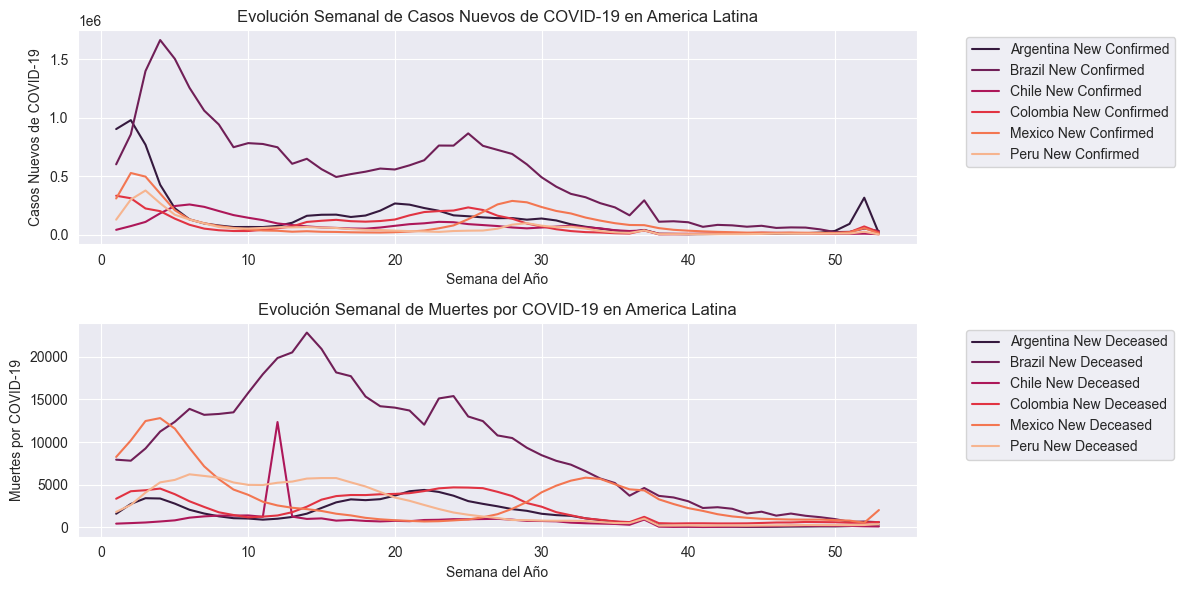

In [60]:
fig,axs = plt.subplots(ncols=1,nrows=2,figsize=config_graficos["figsize"])
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    axs[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    axs[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')
    
axs[0].set_xlabel('Semana del Año')
axs[0].set_ylabel('Casos Nuevos de COVID-19')
axs[0].set_title('Evolución Semanal de Casos Nuevos de COVID-19 en America Latina')
axs[0].legend(bbox_to_anchor=(1.05,1), loc='upper left')

axs[1].set_xlabel('Semana del Año')
axs[1].set_ylabel('Muertes por COVID-19')
axs[1].set_title('Evolución Semanal de Muertes por COVID-19 en America Latina')
axs[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()

## Analizaremos como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por mes (2021)


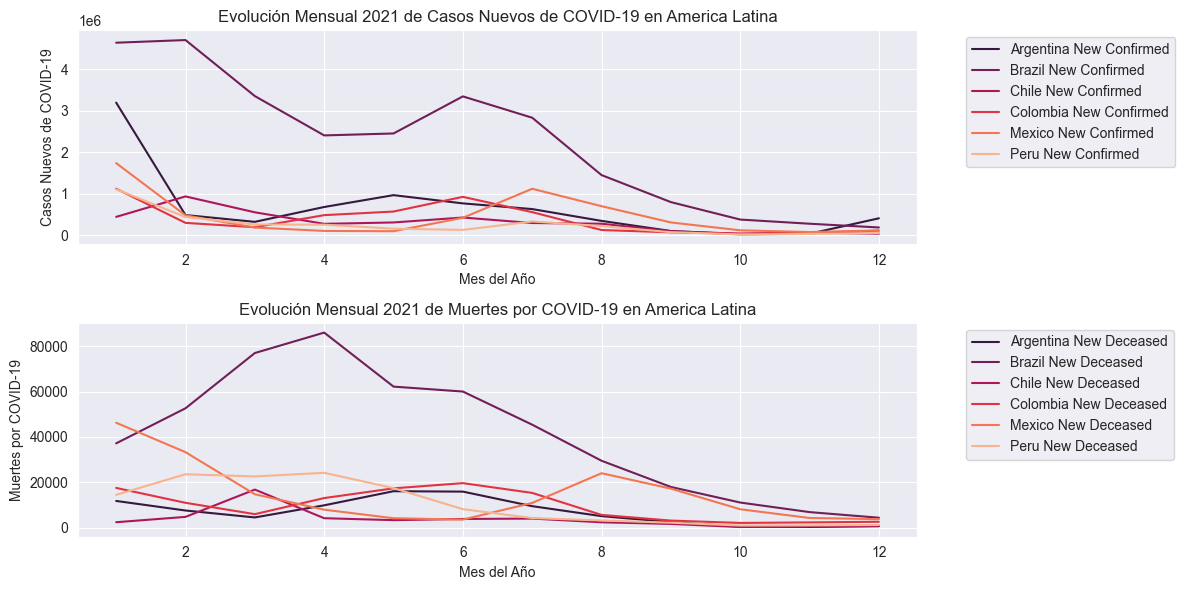

In [49]:
df_av2['month'] = df_av2.index.month
month_cases = df_av2.groupby(['country_name','month'])[['new_confirmed','new_deceased']].sum().reset_index()


fig,axs = plt.subplots(ncols=1,nrows=2,figsize=config_graficos["figsize"])
for country in month_cases['country_name'].unique():
    country_month_cases = month_cases[month_cases['country_name'] == country]
    axs[0].plot(country_month_cases['month'], country_month_cases['new_confirmed'], label=f'{country} New Confirmed')
    axs[1].plot(country_month_cases['month'], country_month_cases['new_deceased'], label=f'{country} New Deceased')
    
axs[0].set_xlabel('Mes del Año')
axs[0].set_ylabel('Casos Nuevos de COVID-19')
axs[0].set_title('Evolución Mensual 2021 de Casos Nuevos de COVID-19 en America Latina')
axs[0].legend(bbox_to_anchor=(1.05,1), loc='upper left')

axs[1].set_xlabel('Mes del Año')
axs[1].set_ylabel('Muertes por COVID-19')
axs[1].set_title('Evolución Mensual 2021 de Muertes por COVID-19 en America Latina')
axs[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()

Se puede observar que los casos y los decesos disminuyeron a lo largo del 2021

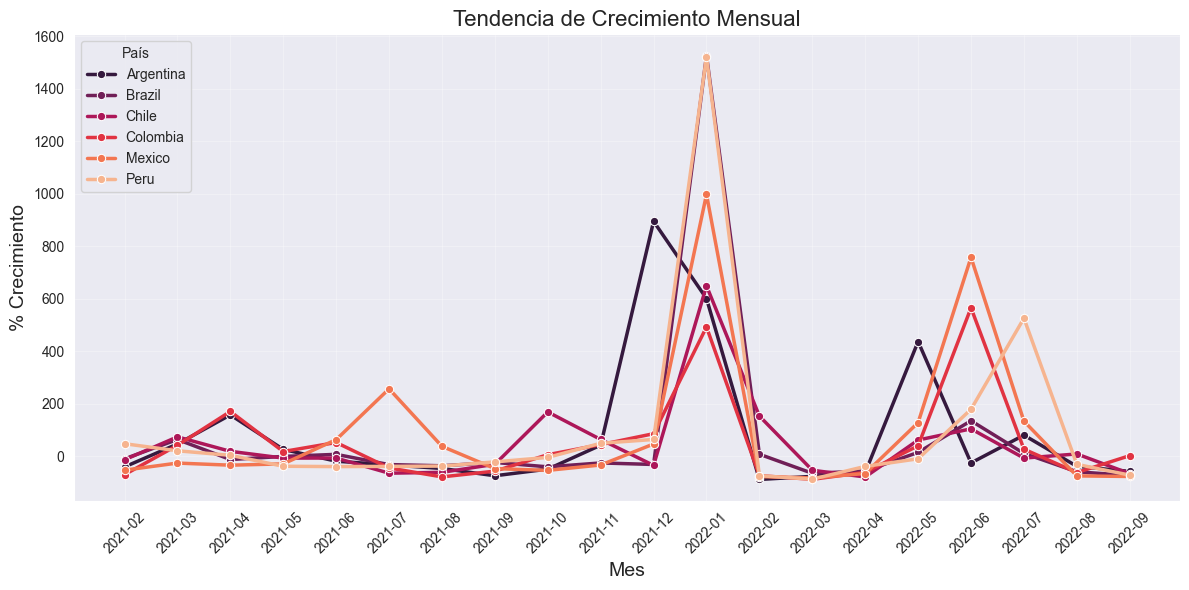

In [ ]:
## 1. Análisis Mensual con Configuración Global
df_mensual = (
    df_av2.reset_index()
    .groupby(['country_name', pd.Grouper(key='date', freq='ME')])
    .agg({
        'new_confirmed': 'sum',
        'new_deceased': 'sum',
        'cumulative_vaccine_doses_administered': 'max'
    })
    .reset_index()
)

# Calcular crecimiento mensual
df_mensual['monthly_growth'] = df_mensual.groupby('country_name')['new_confirmed'].pct_change() * 100

# Gráfico con configuración global
plt.figure(figsize=config_graficos["figsize"])
ax = sns.lineplot(
    x=df_mensual['date'].dt.strftime('%Y-%m'),
    y='monthly_growth',
    hue='country_name',
    data=df_mensual,
    marker='o',
    linewidth=2.5
)

plt.title('Tendencia de Crecimiento Mensual', fontsize=config_graficos["title_fontsize"])
plt.xlabel('Mes', fontsize=config_graficos["label_fontsize"])
plt.ylabel('% Crecimiento', fontsize=config_graficos["label_fontsize"])
plt.xticks(rotation=config_graficos["xticks_rotation"])
if config_graficos["grid"]:
    plt.grid(True, alpha=0.3)
plt.legend(
    title='País',
    loc='upper left',
    frameon=True
)

plt.tight_layout()
plt.show()

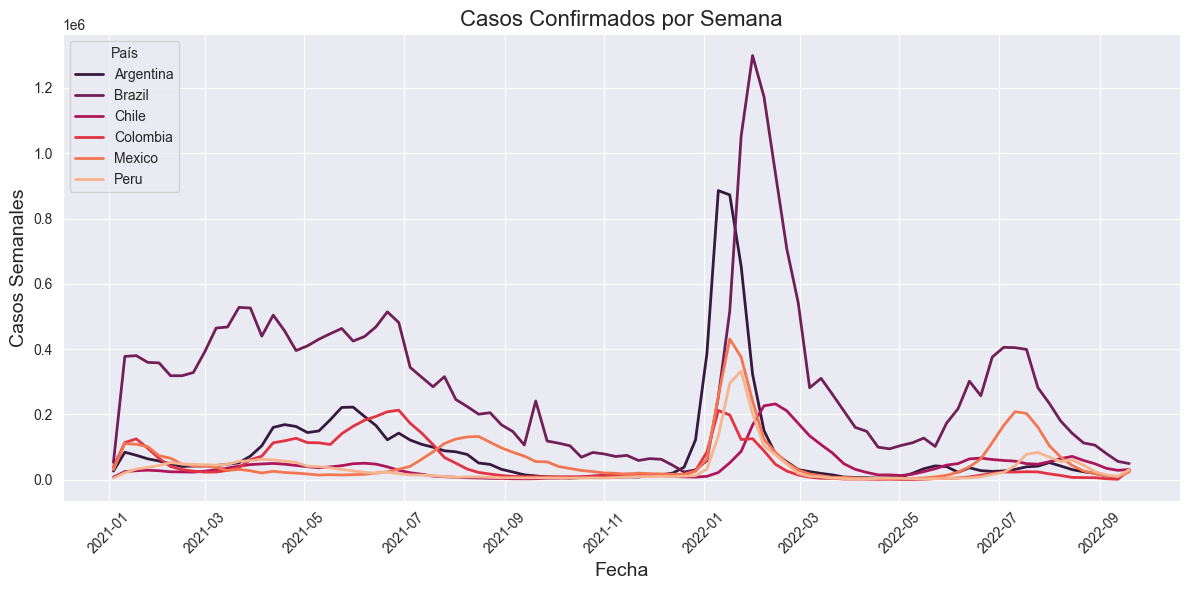

In [ ]:
# Preparar datos semanales
df_semanal = (
    df_av2.reset_index()
    .groupby(['country_name', pd.Grouper(key='date', freq='W-MON')])
    .agg({
        'new_confirmed': 'sum',
        'new_deceased': 'sum'
    })
    .reset_index()
)

# Gráfico semanal
plt.figure(figsize=config_graficos["figsize"])
sns.lineplot(
    x='date',
    y='new_confirmed',
    hue='country_name',
    data=df_semanal,
    linewidth=2
)

plt.title('Casos Confirmados por Semana', fontsize=config_graficos["title_fontsize"])
plt.xlabel('Fecha', fontsize=config_graficos["label_fontsize"])
plt.ylabel('Casos Semanales', fontsize=config_graficos["label_fontsize"])
plt.xticks(rotation=config_graficos["xticks_rotation"])
if config_graficos["grid"]:
    plt.grid(True, alpha=1)
plt.legend(
    title='País',
    loc='upper left',
    frameon=True
)

plt.tight_layout()
plt.show()

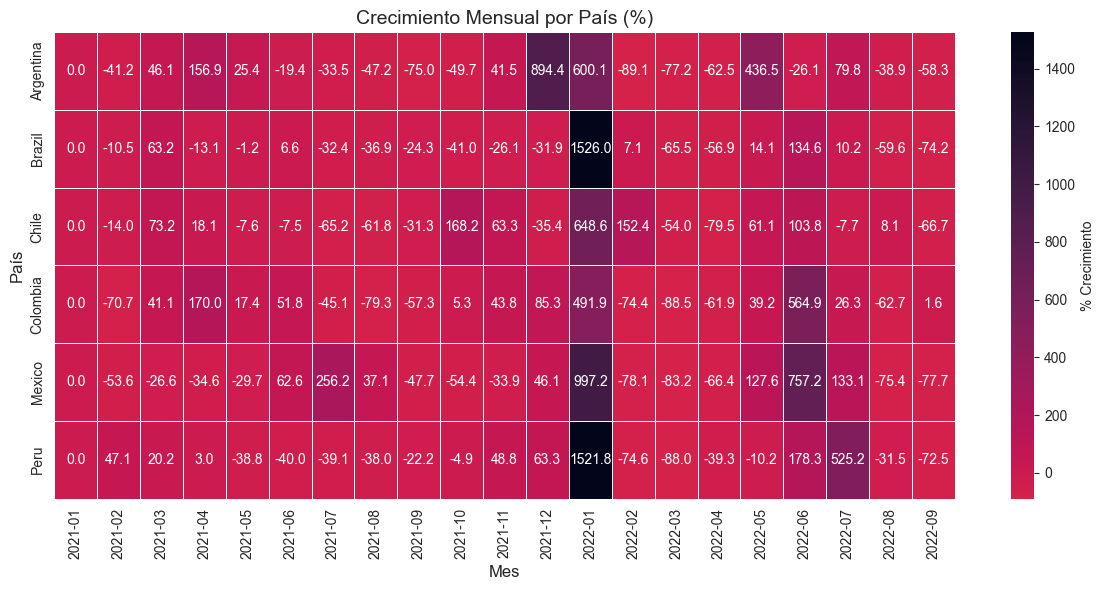

In [ ]:
# 2. Crear columna de año-mes
df_mensual['año_mes'] = df_mensual['date'].dt.strftime('%Y-%m')


# 4. Crear el pivot_data de forma segura
pivot_data = df_mensual.pivot(
    index='country_name',
    columns='año_mes',
    values='monthly_growth'
)
    
# 5. Rellenar valores nulos si es necesario
pivot_data = pivot_data.fillna(0) 
   
# 6. Genera el heatmap
plt.figure(figsize=config_graficos['figsize'])
sns.heatmap(
    pivot_data,
    cmap='rocket_r',
    annot=True,
    fmt=".1f",
    center=0,
    linewidths=.5,
    cbar_kws={'label': '% Crecimiento'}
)
    
plt.title('Crecimiento Mensual por País (%)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()


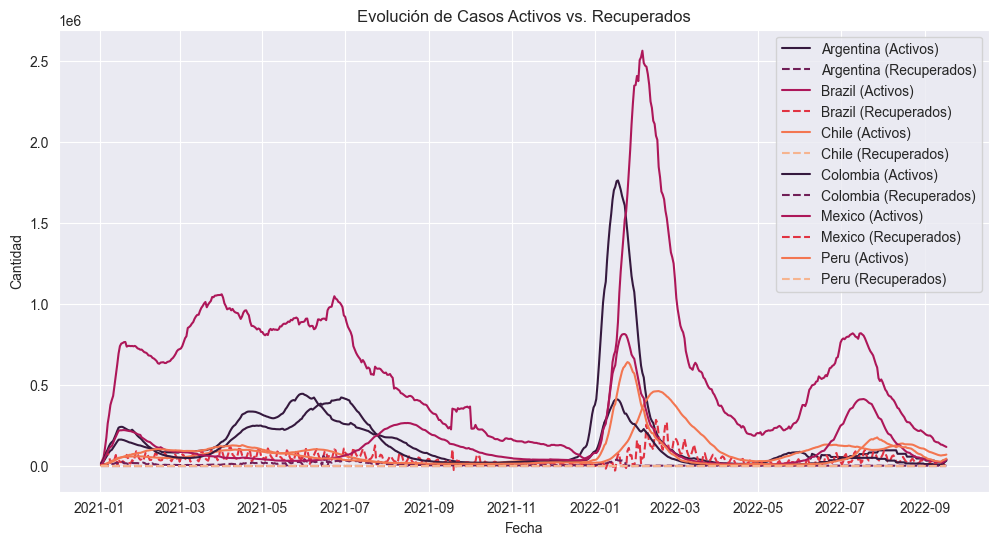

In [ ]:
df_av2['active_cases'] = df_av2.groupby('country_name')['new_confirmed'].transform(
    lambda x: x.rolling(14, min_periods=1).sum()
)

plt.figure(figsize=config_graficos["figsize"])
for pais in df_av2['country_name'].unique():
    datos = df_av2[df_av2['country_name']==pais]
    plt.plot(datos.index, datos['active_cases'], label=f'{pais} (Activos)')
    plt.plot(datos.index, datos['new_recovered'], '--', label=f'{pais} (Recuperados)')
plt.title('Evolución de Casos Activos vs. Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

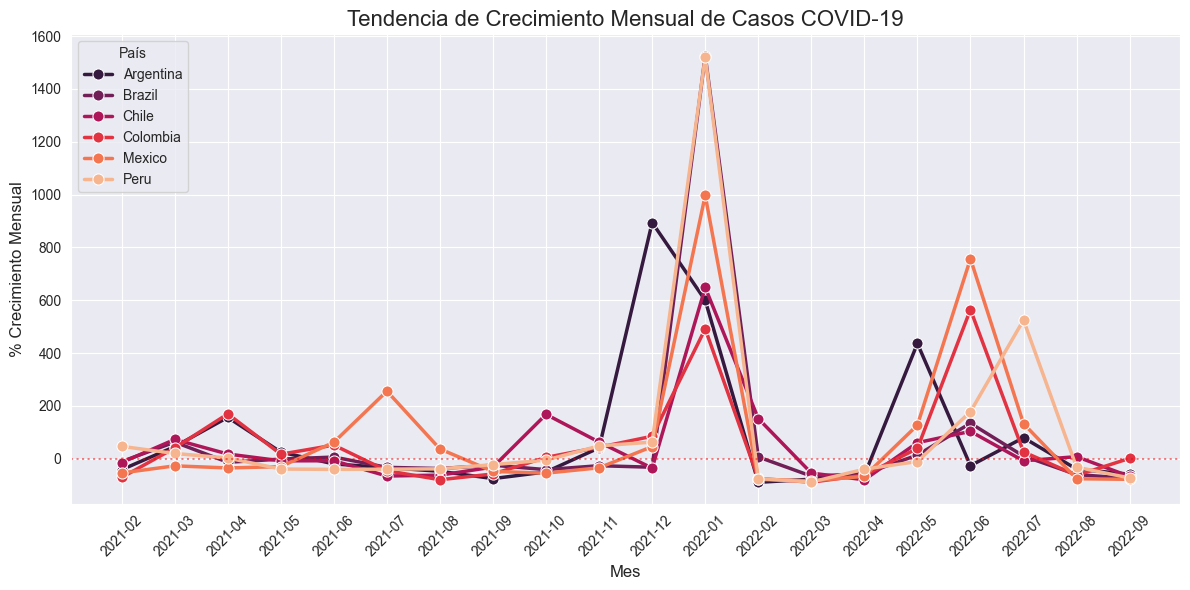

In [ ]:
# 1. Preparar datos mensuales
df_mensual = (
    df_av2.reset_index()
    .groupby(['country_name', pd.Grouper(key='date', freq='ME')])
    .agg({
        'new_confirmed': 'sum',
        'new_deceased': 'sum',
        'cumulative_vaccine_doses_administered': 'max'
    })
    .reset_index()
)

# 2. Calcular crecimiento mensual
df_mensual = df_mensual.sort_values(['country_name', 'date'])
df_mensual['monthly_growth'] = (
    df_mensual.groupby('country_name')['new_confirmed']
    .pct_change() * 100
)

plt.figure(figsize=config_graficos["figsize"])
sns.lineplot(
    x=df_mensual['date'].dt.strftime('%Y-%m'),
    y='monthly_growth',
    hue='country_name',
    data=df_mensual,
    marker='o',
    linewidth=2.5,
    markersize=8
)
plt.title('Tendencia de Crecimiento Mensual de Casos COVID-19', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('% Crecimiento Mensual', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle=':', alpha=0.5)
plt.grid(True, alpha=1)
plt.legend(
    title='País',
    loc='upper left',
    frameon=True
)
plt.tight_layout()
plt.show()

#### Identificación de Tendencias con Agregación Mensual

In [56]:
df_mensual = df_av2.groupby(['country_name', pd.Grouper(freq='ME')]).agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum',
    'cumulative_vaccine_doses_administered': 'max'
}).reset_index()

# Función para detectar tendencia
def detectar_tendencia(serie):
    x = np.arange(len(serie))
    coef = np.polyfit(x, serie, 1)
    return coef[0]  # Pendiente

# Aplicar a cada país
for pais in df_mensual['country_name'].unique():
    datos = df_mensual[df_mensual['country_name'] == pais]
    tendencia = detectar_tendencia(datos['new_confirmed'])
    print(f"{pais}: Tendencia {'ascendente' if tendencia > 0 else 'descendente'} ({tendencia:.2f})")

Argentina: Tendencia descendente (-12777.09)
Brazil: Tendencia descendente (-44143.02)
Chile: Tendencia ascendente (7459.31)
Colombia: Tendencia descendente (-21008.77)
Mexico: Tendencia ascendente (2470.63)
Peru: Tendencia descendente (-609.34)


#### Análisis de Relación Vacunación-Casos

In [59]:
# Calcular correlación con desplazamiento temporal
def mejor_correlacion(vacunacion, casos, max_dias=30):
    correlaciones = []
    for desplazamiento in range(max_dias):
        corr = np.corrcoef(vacunacion[:-desplazamiento or None], 
                          casos[desplazamiento:])[0,1]
        correlaciones.append(corr)
    return np.argmax(correlaciones), max(correlaciones)

# Aplicar a cada país
for pais in df_av2['country_name'].unique():
    datos = df_av2[df_av2['country_name'] == pais]
    dias, corr = mejor_correlacion(
        datos['cumulative_vaccine_doses_administered'],
        datos['new_confirmed']
    )
    print(f"{pais}: Máxima correlación ({corr:.2f}) con {dias} días de desfase")

Argentina: Máxima correlación (-0.14) con 27 días de desfase
Brazil: Máxima correlación (-0.19) con 29 días de desfase
Chile: Máxima correlación (0.26) con 9 días de desfase
Colombia: Máxima correlación (-0.00) con 6 días de desfase
Mexico: Máxima correlación (0.13) con 0 días de desfase
Peru: Máxima correlación (0.04) con 29 días de desfase
